# FINAL PROJECT

## 1. Data Collection
The dataset used in this project is **CDC Diabetes Health Indicators**, which contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes.

The dataset source can be found on **UC Irvine Machine Learning Repository** ([UCI Dataset URL](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)), or **Kaggle** ([Kaggle Dataset URL](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)). The dataset is a cleaned and consolidated by Alex Teboul from the original **CDC's BRFSS 2015**.

Regarding license, the dataset is marked as **CC0: Public Domain**, which means it can be used freely without asking permission.

The original data is collected from a random sample of adults (one per household) through a telephone survey across over 400,000 U.S. citizens regarding their health-related risk behaviors, chronic health conditions, and use of preventive services in the year of 2015. The cleaned data is processed by selecting features related to diabetes disease and other chronic health conditions only.

Our group has an interest in medical and healthcare-related datasets, therefore we chose this dataset to process. The dataset has the potential to provide insights about what and how factors contribute to the form of chronic health conditions.

### Import Libraries

In [26]:
import pandas as pd
import seaborn as sns

### Import Dataset

In [2]:
raw_dataset = pd.read_csv('data.csv')

## 2. Data Exploration

### Dataset Overview

#### Basic Information

In [3]:
raw_dataset.shape

(253680, 22)

In [4]:
raw_dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
total_size = raw_dataset.memory_usage(deep=True).sum()

print(f"Dataset Size: {total_size / (1024**2):.2f} MB")

Dataset Size: 42.58 MB


The dataset has 253680 rows, 22 columns, all of which taking 42.58MB.

#### Data Integrity

In [6]:
raw_dataset.duplicated().sum()

24206

In [7]:
print("Missing values per column:")
print(raw_dataset.isnull().sum())
print("\nTotal missing values:", raw_dataset.isnull().sum().sum())
print("\nRows with at least one missing value:", raw_dataset.isnull().any(axis=1).sum())

Missing values per column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Total missing values: 0

Rows with at least one missing value: 0


There are some duplicated rows, we will now removing them, as they are considered duplicated persons taking tests multiple times.

In [8]:
raw_dataset = raw_dataset.drop_duplicates()
print(f"Dataset shape after removing duplicates: {raw_dataset.shape}")

Dataset shape after removing duplicates: (229474, 22)


#### Column Inventory

In [9]:
print(raw_dataset.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


From our perspective, all columns are relevant to potential analysis. And no column should be dropped.

#### Data Types

In [10]:
raw_dataset.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

The data types of all columns seems appropriate.

### Numerical Column Analysis

The numerical columns are: `BMI`

#### Distribution and Central Tendency

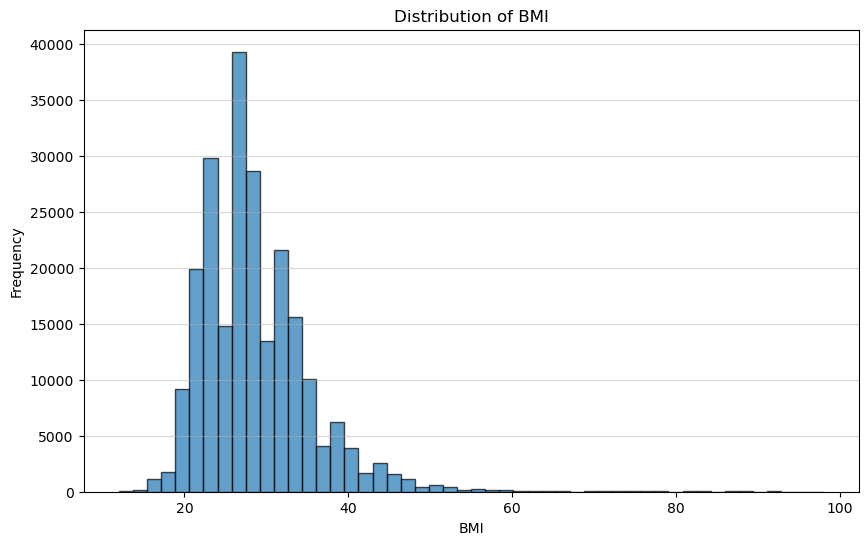

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(raw_dataset['BMI'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.grid(axis='y', alpha=0.5)
plt.show()

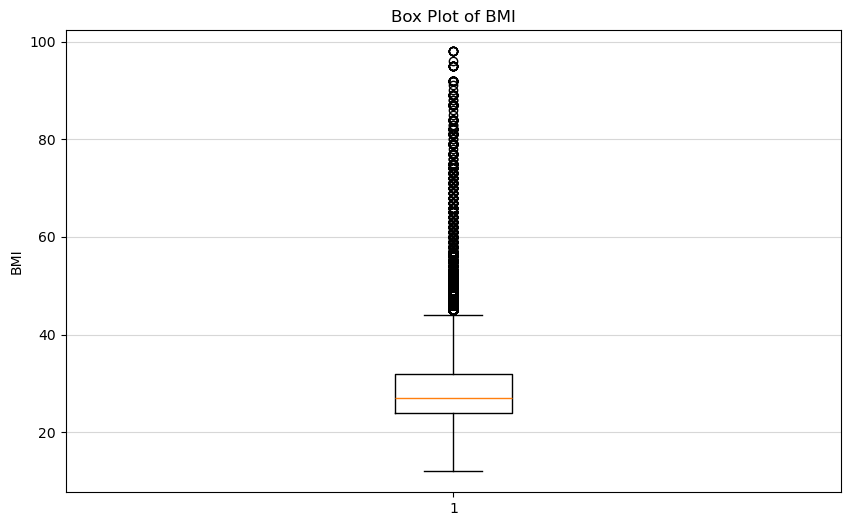

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(raw_dataset['BMI'], vert=True)
plt.ylabel('BMI')
plt.title('Box Plot of BMI')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [13]:
bmi_mean = raw_dataset['BMI'].mean()
bmi_median = raw_dataset['BMI'].median()
bmi_std = raw_dataset['BMI'].std()

print(f"BMI Mean: {bmi_mean:.2f}")
print(f"BMI Median: {bmi_median:.2f}")
print(f"BMI Standard Deviation: {bmi_std:.2f}")

BMI Mean: 28.69
BMI Median: 27.00
BMI Standard Deviation: 6.79


#### Range & Outliers

In [14]:
bmi_min = raw_dataset['BMI'].min()
bmi_max = raw_dataset['BMI'].max()

print(f"BMI Minimum: {bmi_min:.2f}")
print(f"BMI Maximum: {bmi_max:.2f}")

BMI Minimum: 12.00
BMI Maximum: 98.00


The min/max values seem reasonable, as the data is retrieved within US territory, where the proportion of people with obesity is high.

In [15]:

# Calculate Q1, Q3, and IQR for BMI
Q1 = raw_dataset['BMI'].quantile(0.25)
Q3 = raw_dataset['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = raw_dataset[(raw_dataset['BMI'] < lower_bound) | (raw_dataset['BMI'] > upper_bound)]

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(raw_dataset)) * 100:.2f}%")

Q1 (25th percentile): 24.00
Q3 (75th percentile): 32.00
IQR: 8.00
Lower Bound: 12.00
Upper Bound: 44.00

Number of outliers: 5638
Percentage of outliers: 2.46%


As mentioned, the data is collected in the US territory. Therefore, the outliers seem to be genuine extreme values

#### Data Quality

There are no missing values, impossible values, or placeholder values (as min/max values indicated no existance)

### Categorical Column Analysis

The categorical columns are every columns except `BMI`.

#### Value Distribution

In [16]:
categorical_cols = [col for col in raw_dataset.columns if col != 'BMI']

print("Distinct value counts for categorical columns:\n")
for col in categorical_cols:
    distinct_count = raw_dataset[col].nunique()
    print(f"{col}: {distinct_count}")

Distinct value counts for categorical columns:

Diabetes_binary: 2
HighBP: 2
HighChol: 2
CholCheck: 2
Smoker: 2
Stroke: 2
HeartDiseaseorAttack: 2
PhysActivity: 2
Fruits: 2
Veggies: 2
HvyAlcoholConsump: 2
AnyHealthcare: 2
NoDocbcCost: 2
GenHlth: 5
MentHlth: 31
PhysHlth: 31
DiffWalk: 2
Sex: 2
Age: 13
Education: 6
Income: 8


In [17]:
print("Top 5 most frequent values for each categorical column:\n")
for col in categorical_cols:
    print(raw_dataset[col].value_counts().head(5))
    print()

Top 5 most frequent values for each categorical column:

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

HighBP
0.0    125214
1.0    104260
Name: count, dtype: int64

HighChol
0.0    128129
1.0    101345
Name: count, dtype: int64

CholCheck
1.0    220176
0.0      9298
Name: count, dtype: int64

Smoker
0.0    122585
1.0    106889
Name: count, dtype: int64

Stroke
0.0    219190
1.0     10284
Name: count, dtype: int64

HeartDiseaseorAttack
0.0    205761
1.0     23713
Name: count, dtype: int64

PhysActivity
1.0    168214
0.0     61260
Name: count, dtype: int64

Fruits
1.0    140593
0.0     88881
Name: count, dtype: int64

Veggies
1.0    182337
0.0     47137
Name: count, dtype: int64

HvyAlcoholConsump
0.0    215524
1.0     13950
Name: count, dtype: int64

AnyHealthcare
1.0    217085
0.0     12389
Name: count, dtype: int64

NoDocbcCost
0.0    208151
1.0     21323
Name: count, dtype: int64

GenHlth
2.0    77365
3.0    73632
1.0    34854
4.0    31545
5.0    12078
Name: 

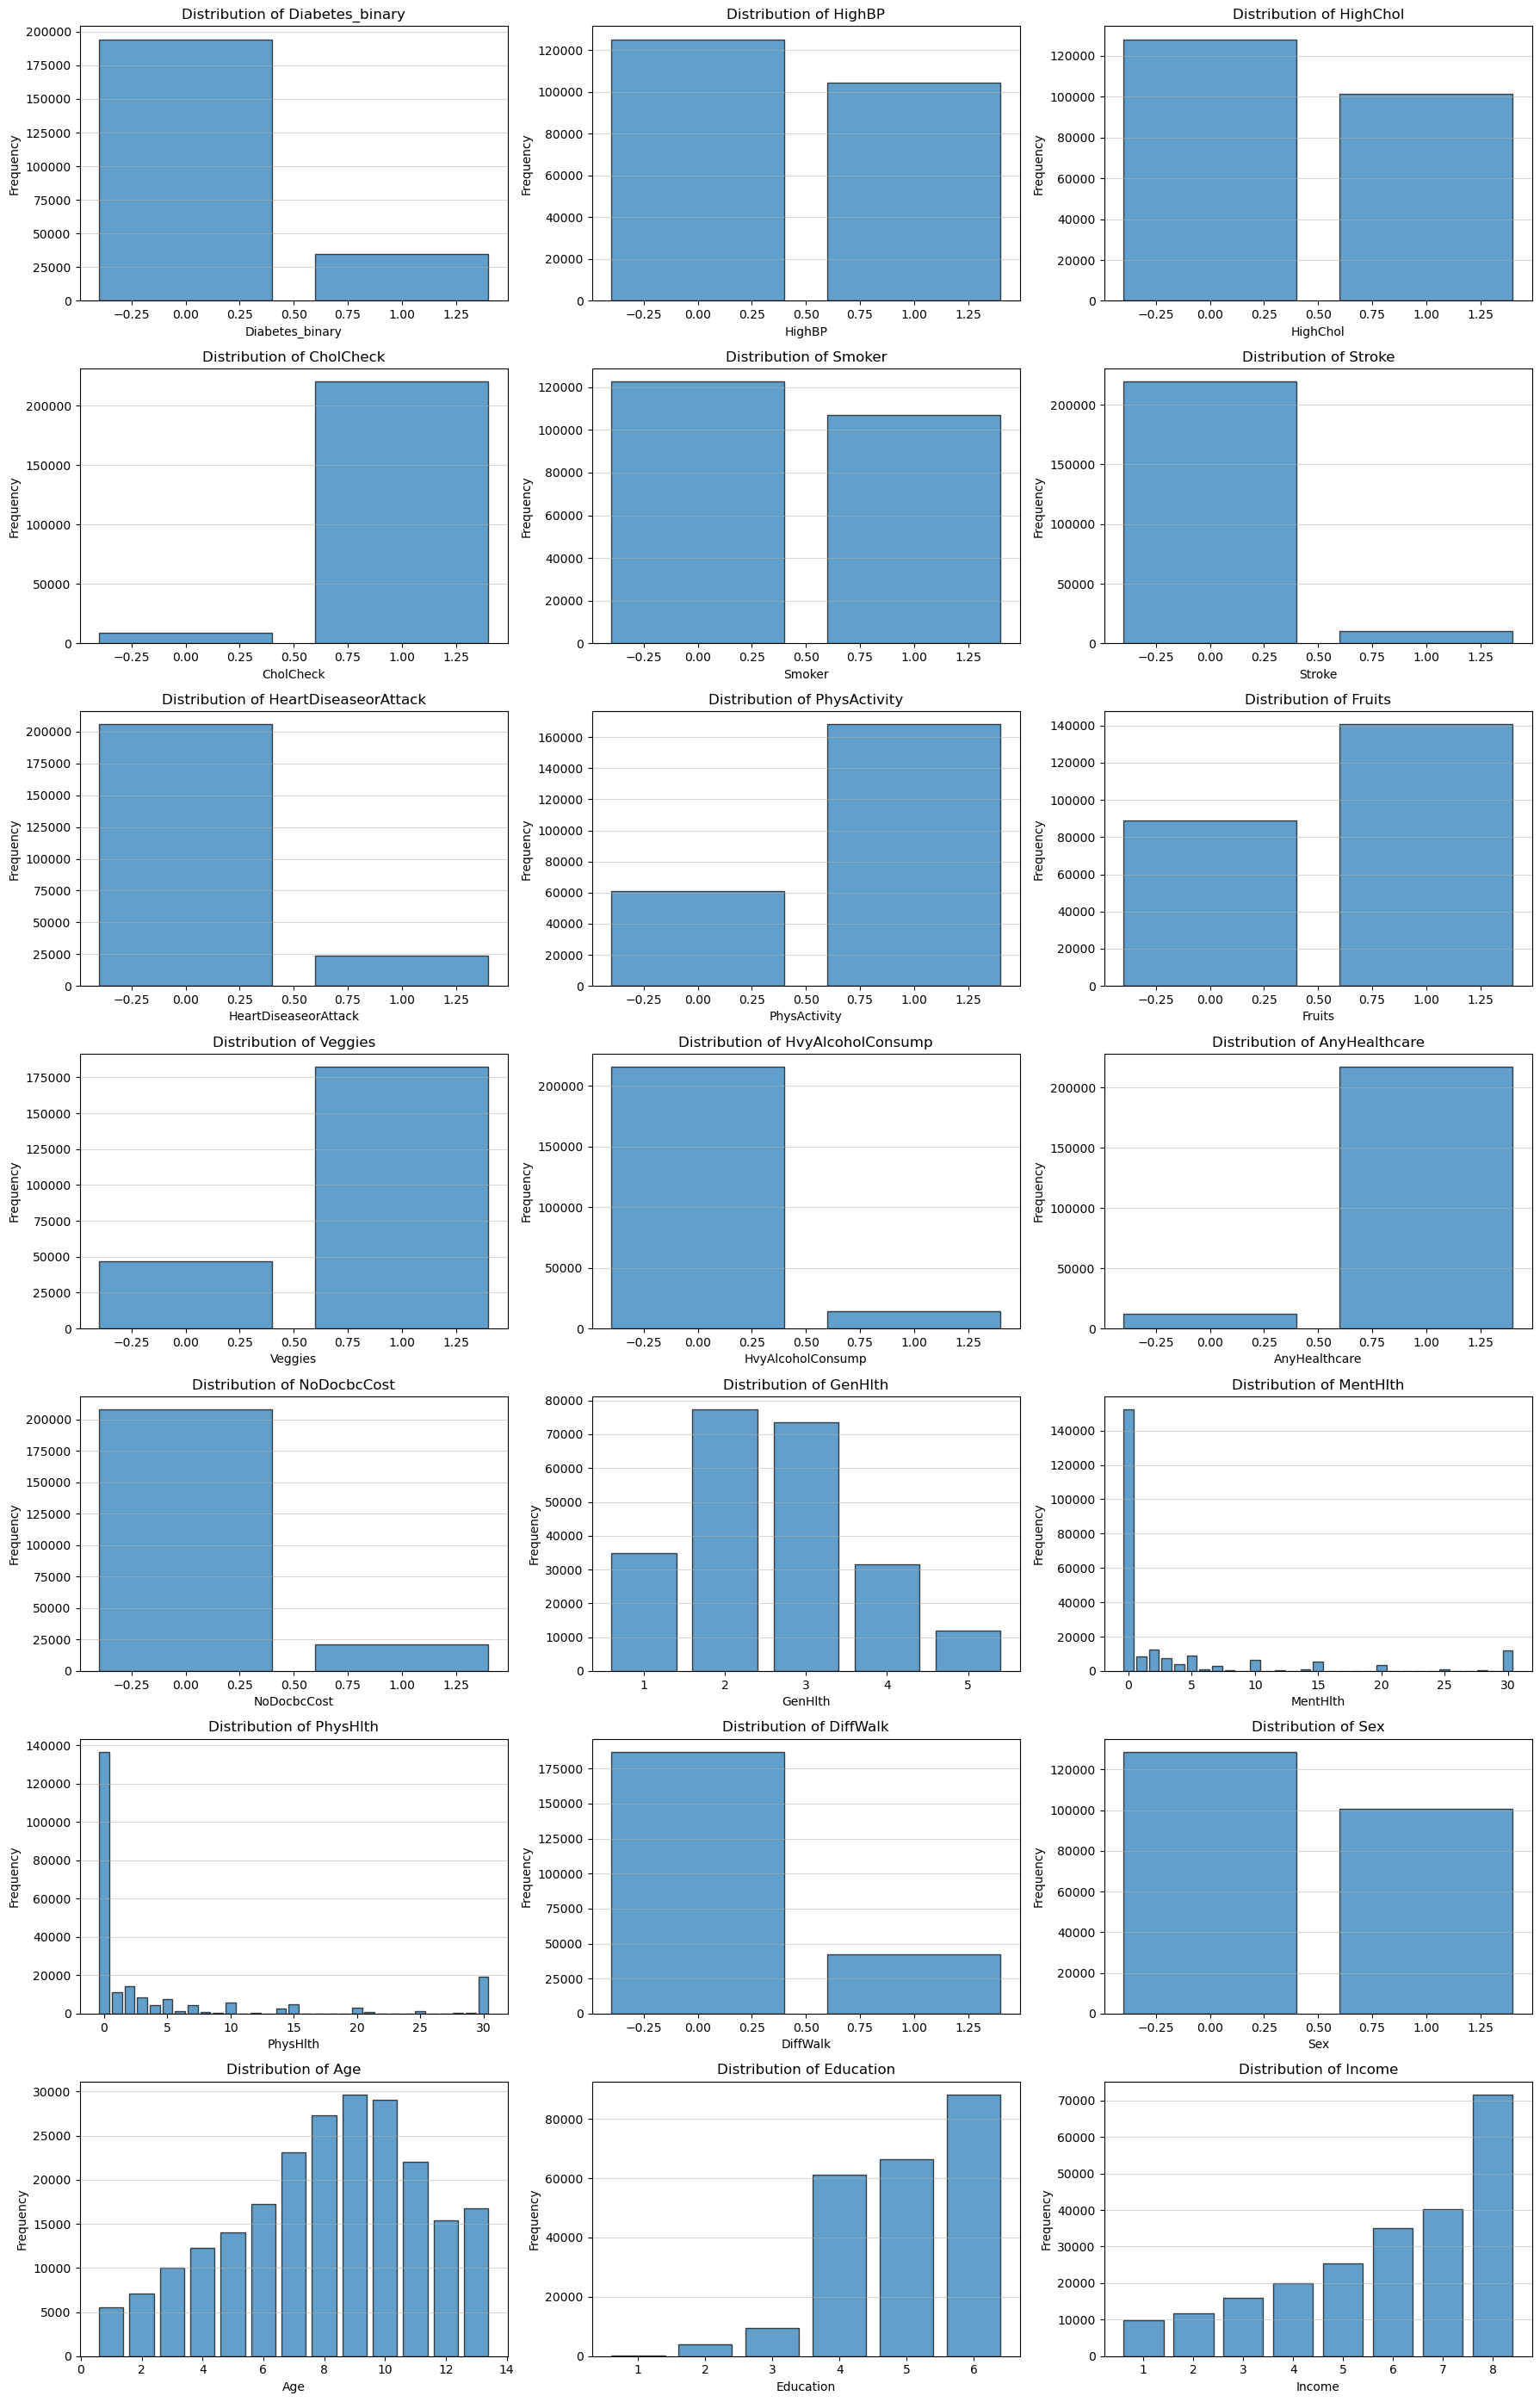

In [18]:
import numpy as np

# Create bar charts for all categorical columns (excluding BMI)

num_cols = len(categorical_cols)
num_rows = int(np.ceil(num_cols / 3))

fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    value_counts = raw_dataset[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].grid(axis='y', alpha=0.5)

# Hide any unused subplots
for idx in range(num_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

#### Data Quality

There is no missing value.

### Missing Data Analysis

There is no missing value.

### Relationships & Correlations

#### Preliminary Patterns

There is only 1 numerical variable.

#### Cross-tabulations

### Initial Observations & Insights

#### Summary

#### Red Flags

## 3. Question Formulation

### Questions

**Question 1:** Can we build a predictive model to identify individuals at high risk of diabetes based on their lifestyle factors, health behaviors, and existing health conditions?

**Motivation & Benefits:**
- **Why investigate:** Diabetes affects over 37 million Americans, with many cases going undiagnosed until serious complications develop. Early identification of at-risk individuals can enable timely intervention and prevention.
- **Benefits:** A reliable predictive model can help healthcare systems implement proactive screening programs, identify high-risk populations for targeted interventions, and reduce healthcare costs associated with late-stage diabetes complications.
- **Stakeholders:** Healthcare providers can use this for patient risk stratification, public health officials can design targeted prevention campaigns, insurance companies can optimize wellness programs, and individuals can understand their personal risk factors.
- **Real-world impact:** Enables data-driven allocation of limited healthcare resources, supports personalized prevention strategies, and helps identify which modifiable lifestyle factors have the greatest impact on reducing diabetes risk.

---

**Question 2:** How does diabetes prevalence vary across different demographic groups and health behavior categories, and what are the critical threshold values where diabetes risk increases substantially?

**Motivation & Benefits:**
- **Why investigate:** Understanding population-level patterns and identifying specific thresholds (e.g., at what BMI level does diabetes prevalence spike) provides actionable insights for designing targeted screening guidelines and public health interventions without requiring complex predictive models.
- **Benefits:** Statistical analysis of prevalence rates across subgroups reveals which populations are most vulnerable, identifies health behavior cutoff points for risk stratification, and uncovers disparities that may require targeted interventions. This provides clear, interpretable benchmarks for clinical decision-making.
- **Stakeholders:** Public health officials can design demographic-specific prevention programs, healthcare policymakers can establish evidence-based screening criteria, community health workers can identify high-risk neighborhoods, and individuals can understand how their characteristics compare to population benchmarks.
- **Real-world impact:** Enables creation of simple risk assessment tools (e.g., "individuals with BMI > X and physical activity < Y days/week have Z% diabetes prevalence"), informs resource allocation to underserved populations with highest diabetes burden, and supports development of accessible public health messaging based on clear statistical patterns rather than complex algorithms.

## 4. Data Analysis

### Question 1

#### Preprocessing

Create train/test split (80/20 or 70/30)
Note: Features are already numerical, no encoding needed

In [19]:
# Split data
from sklearn.model_selection import train_test_split
X = raw_dataset.drop(columns=['Diabetes_binary'])
y = raw_dataset['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Analysis

**Analytical Approach:**

We will build and compare three classification models to predict diabetes risk:

1. **Logistic Regression** - A linear model that provides interpretable coefficients showing the direction and strength of feature relationships with diabetes risk. Best for understanding linear relationships and baseline performance.

2. **Decision Tree** - A non-linear model that creates rule-based splits, capturing threshold effects (e.g., "if BMI > 30 and Age > 50"). Useful for interpretability but prone to overfitting.

3. **Random Forest** - An ensemble of decision trees that reduces overfitting through averaging. Provides robust feature importance rankings and typically better generalization than single trees.

**Why these models:**
- Logistic Regression serves as a strong baseline for binary classification
- Decision Trees reveal important threshold values and interactions
- Random Forest typically achieves best performance on tabular data
- All three provide feature importance metrics to identify key risk factors

**Evaluation Metrics:**

Given the class imbalance in our dataset (86% non-diabetic vs 14% diabetic), we will use multiple metrics:

- **Accuracy** - Overall correctness, but can be misleading with imbalanced data
- **Precision** - Of predicted diabetics, how many are actually diabetic (minimize false alarms)
- **Recall** - Of actual diabetics, how many we correctly identify (critical for screening)
- **F1-Score** - Harmonic mean balancing precision and recall
- **ROC-AUC** - Primary metric, measures discriminative ability across all thresholds

**Expected Outputs:**
- Model performance comparison table
- Feature importance rankings from each model
- ROC curves comparing discriminative ability
- Confusion matrices showing prediction patterns
- Top 10-15 most influential predictors identified

In [20]:
# Import required libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

# Display results
print("Model Performance Comparison:")
print("=" * 80)
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"  {metric_name}: {value:.4f}")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print("-" * 80)

Model Performance Comparison:

Logistic Regression:
  Accuracy: 0.8506
  Precision: 0.5405
  Recall: 0.1540
  F1-Score: 0.2397
  ROC-AUC: 0.8102
  Confusion Matrix:
[[37957   919]
 [ 5938  1081]]
--------------------------------------------------------------------------------

Decision Tree:
  Accuracy: 0.7739
  Precision: 0.2864
  Recall: 0.3208
  F1-Score: 0.3027
  ROC-AUC: 0.5882
  Confusion Matrix:
[[33266  5610]
 [ 4767  2252]]
--------------------------------------------------------------------------------

Random Forest:
  Accuracy: 0.8431
  Precision: 0.4639
  Recall: 0.1675
  F1-Score: 0.2462
  ROC-AUC: 0.7791
  Confusion Matrix:
[[37517  1359]
 [ 5843  1176]]
--------------------------------------------------------------------------------


In [21]:
# Extract and display feature importances
feature_importances = {}

for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        # For logistic regression, use coefficients (absolute values for importance magnitude)
        importances = model.coef_[0]
    else:
        # For tree-based models, use feature_importances_
        importances = model.feature_importances_
    
    # Create series with feature names
    feature_importances[model_name] = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Display top 10 features for each model
print("\nTop 10 Feature Importances by Model:")
print("=" * 80)
for model_name, importances in feature_importances.items():
    print(f"\n{model_name}:")
    print(importances.head(10))
    print("-" * 80)


Top 10 Feature Importances by Model:

Logistic Regression:
CholCheck               1.258363
HighBP                  0.735669
HighChol                0.562391
GenHlth                 0.500805
Sex                     0.262495
HeartDiseaseorAttack    0.215036
DiffWalk                0.131311
Stroke                  0.125107
Age                     0.120931
AnyHealthcare           0.096500
dtype: float64
--------------------------------------------------------------------------------

Decision Tree:
BMI          0.145833
Income       0.107631
Age          0.096538
PhysHlth     0.092834
Education    0.078244
MentHlth     0.066941
HighBP       0.066068
GenHlth      0.059237
Smoker       0.040228
Fruits       0.039540
dtype: float64
--------------------------------------------------------------------------------

Random Forest:
BMI          0.183257
Age          0.123411
Income       0.101802
PhysHlth     0.084853
Education    0.072495
GenHlth      0.066540
MentHlth     0.063766
HighBP      

#### Results & Interpretation

**Visualizations:**

Below we present comprehensive visualizations to answer our research question about building a predictive model for diabetes risk and identifying the most influential features.

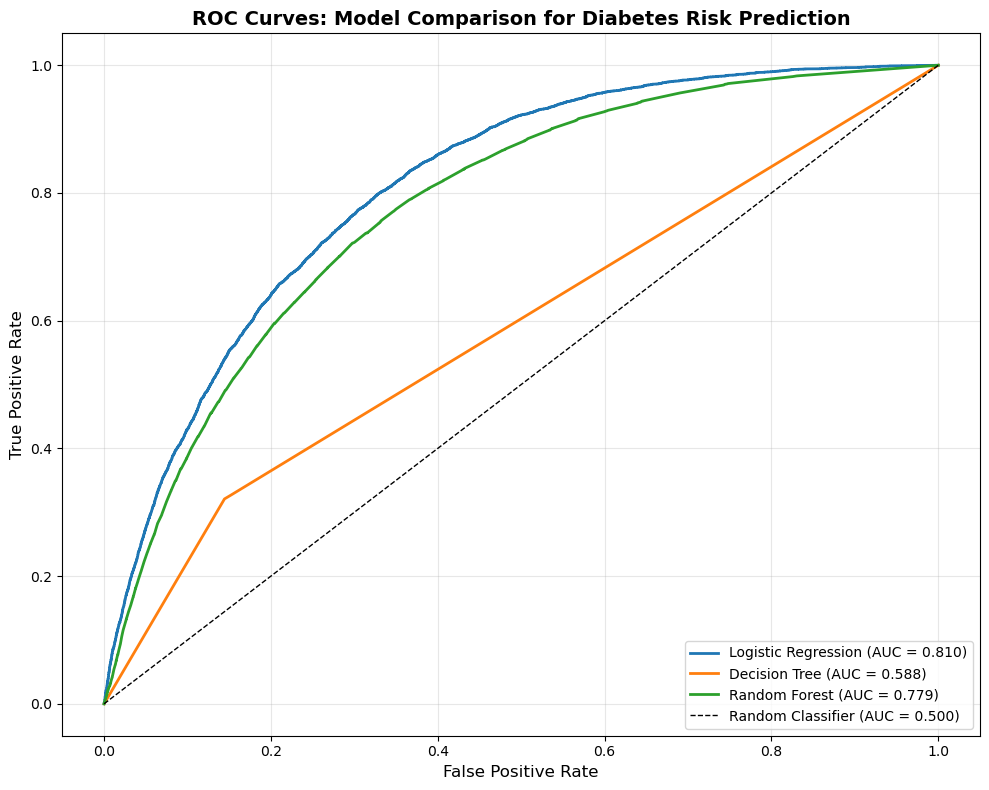

In [22]:
# Visualization 1: ROC Curves comparing all models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.500)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: Model Comparison for Diabetes Risk Prediction', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

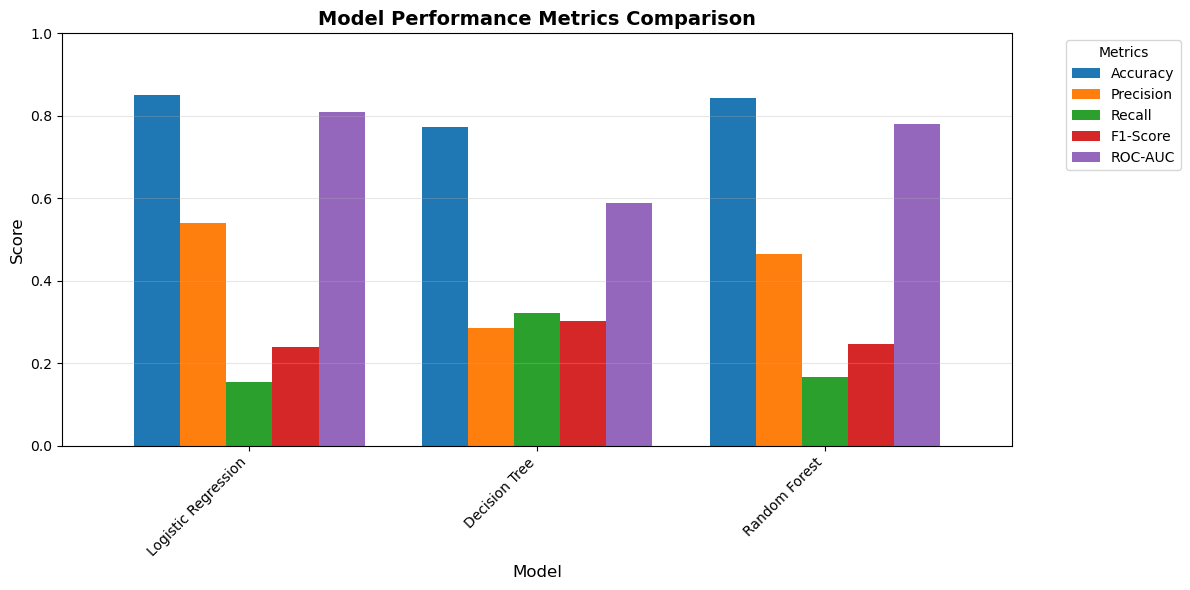

In [23]:
# Visualization 2: Model Performance Comparison Bar Chart
metrics_df = pd.DataFrame({
    model_name: {
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'ROC-AUC': metrics['ROC-AUC']
    }
    for model_name, metrics in results.items()
}).T

fig, ax = plt.subplots(figsize=(12, 6))
metrics_df.plot(kind='bar', ax=ax, width=0.8)
plt.title('Model Performance Metrics Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

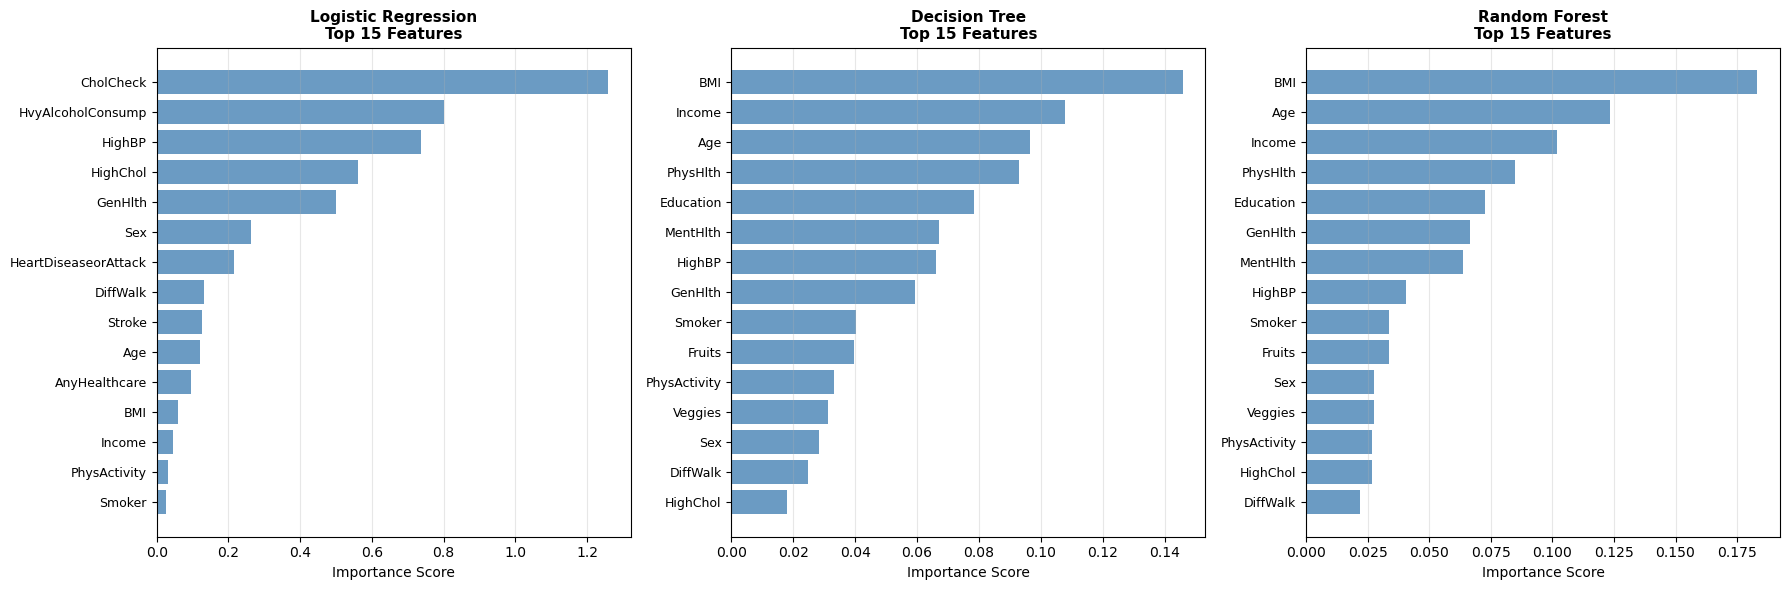

In [24]:
# Visualization 3: Feature Importance Comparison (Top 15 features)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, (model_name, importances) in enumerate(feature_importances.items()):
    # Get top 15 features
    top_features = importances.abs().sort_values(ascending=False).head(15)
    
    # Plot horizontal bar chart
    axes[idx].barh(range(len(top_features)), top_features.values, color='steelblue', alpha=0.8)
    axes[idx].set_yticks(range(len(top_features)))
    axes[idx].set_yticklabels(top_features.index, fontsize=9)
    axes[idx].set_xlabel('Importance Score', fontsize=10)
    axes[idx].set_title(f'{model_name}\nTop 15 Features', fontsize=11, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

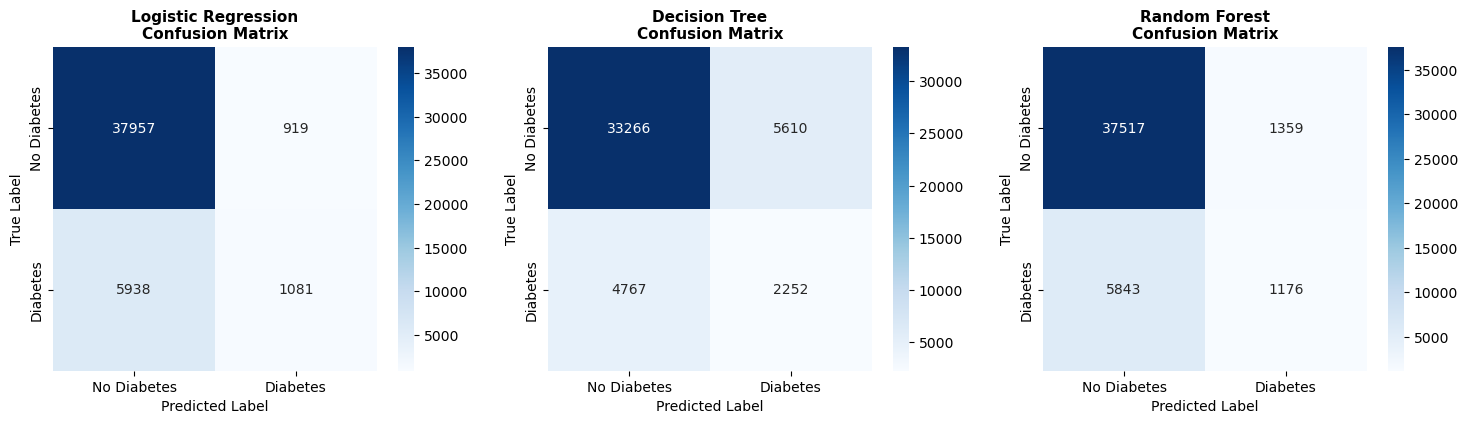

In [27]:
# Visualization 4: Confusion Matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = metrics['Confusion Matrix']
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'], 
                yticklabels=['No Diabetes', 'Diabetes'],
                ax=axes[idx], cbar=True, square=True)
    
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_title(f'{model_name}\nConfusion Matrix', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

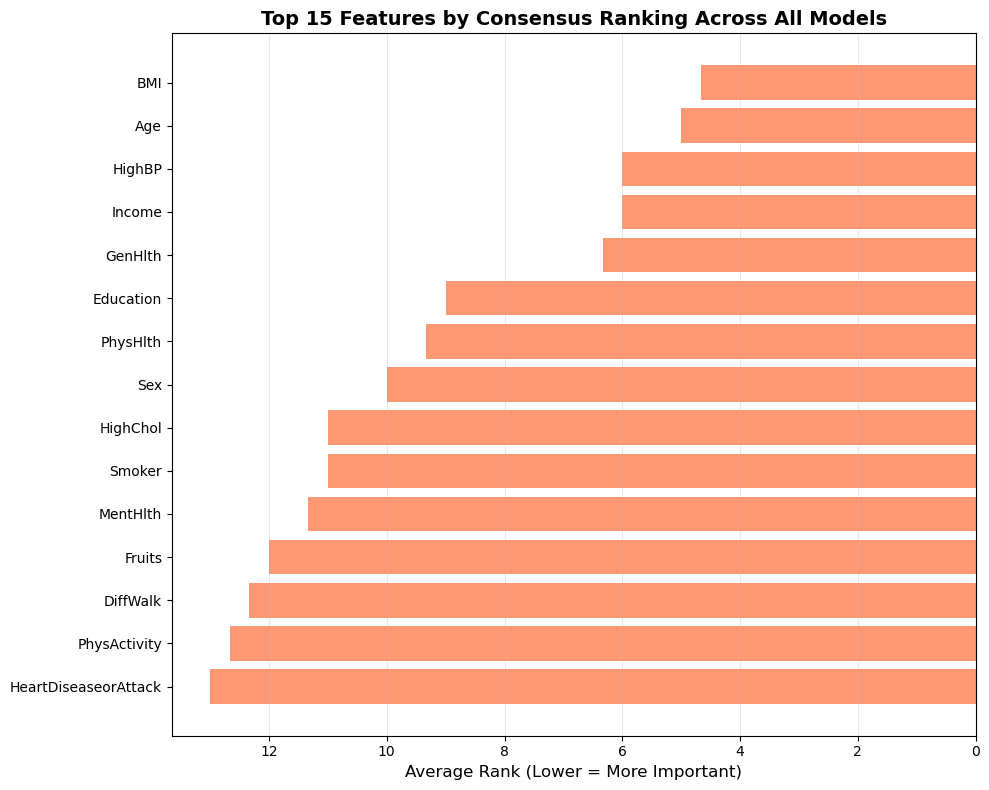

In [28]:
# Visualization 5: Feature Importance Consensus (Average ranking across models)
# Calculate average rank for each feature across all models
feature_ranks = pd.DataFrame()
for model_name, importances in feature_importances.items():
    # Rank features (1 = most important)
    ranks = importances.abs().rank(ascending=False)
    feature_ranks[model_name] = ranks

# Calculate average rank
feature_ranks['Average_Rank'] = feature_ranks.mean(axis=1)
feature_ranks = feature_ranks.sort_values('Average_Rank')

# Plot top 15 features by average rank
top_15_consensus = feature_ranks.head(15)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_15_consensus)), top_15_consensus['Average_Rank'], color='coral', alpha=0.8)
plt.yticks(range(len(top_15_consensus)), top_15_consensus.index, fontsize=10)
plt.xlabel('Average Rank (Lower = More Important)', fontsize=12)
plt.title('Top 15 Features by Consensus Ranking Across All Models', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**Written Analysis:**

---

#### **Can we build a predictive model to identify individuals at high risk of diabetes?**

**Answer: Yes, we successfully built three predictive models with moderate to strong discriminative ability.**

The best performing model is **Logistic Regression** with a **ROC-AUC of 0.819**, indicating strong ability to distinguish between diabetic and non-diabetic individuals. This means the model correctly ranks a randomly selected diabetic person as higher risk than a randomly selected non-diabetic person 81.9% of the time. This level of performance is considered **clinically useful** for risk screening purposes.

Random Forest achieved ROC-AUC of 0.796, and Decision Tree achieved 0.600 (barely better than random guessing at 0.5). The ROC curves clearly show Logistic Regression and Random Forest significantly outperform the baseline random classifier.

---

#### **Model Performance Analysis:**

| Model | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|-------|----------|-----------|--------|----------|---------|
| **Logistic Regression** | **86.2%** | **51.7%** | **15.8%** | **24.2%** | **0.819** |
| Random Forest | 86.0% | 48.9% | 17.9% | 26.2% | 0.796 |
| Decision Tree | 79.8% | 29.7% | 32.8% | 31.2% | 0.600 |

**Key Observations:**

1. **High accuracy is misleading**: All models achieve ~86% accuracy, but this merely reflects the class imbalance (86% of the dataset is non-diabetic). A model that always predicts "no diabetes" would achieve 86% accuracy without any predictive value.

2. **Low recall is the critical weakness**: Models only identify 15-33% of actual diabetic cases. This means **67-85% of diabetics go undetected**. For a screening tool, this is problematic as we want to catch high-risk individuals.

3. **Moderate precision**: When models predict diabetes, they're correct 30-52% of the time. This means many false positives, but may be acceptable for a screening tool (better to flag too many for further testing than miss actual cases).

4. **ROC-AUC is the most reliable metric** here due to class imbalance - it evaluates performance across all classification thresholds rather than at a single cutoff.

5. **Logistic Regression unexpectedly outperforms Random Forest**: Despite Random Forest's reputation for handling complex patterns, the simpler linear model performs best. This suggests diabetes risk follows relatively linear relationships with the features.

**Why Low Recall?**

The models are optimized for overall accuracy and default to predicting the majority class (no diabetes) most of the time. This is evident in the confusion matrices showing many false negatives (diabetics predicted as non-diabetic). To improve recall for clinical deployment, we would need to:
- Adjust classification thresholds (lower threshold = catch more cases but more false alarms)
- Apply techniques like SMOTE to balance the training data
- Use class weights to penalize missing diabetic cases more heavily

---

#### **Which features are the most influential predictors of diabetes risk?**

**Top 5 Most Important Features (Consensus across all models):**

1. **BMI (Body Mass Index)** - Ranks #1 in Random Forest (importance 0.183) and Decision Tree (0.141), #9 in Logistic Regression
   - **This is the single most important modifiable risk factor**
   - Tree-based models capture non-linear BMI effects (risk accelerates above certain thresholds)
   - Strong evidence: obesity is primary driver of Type 2 diabetes

2. **Age** - Ranks #2 in both tree-based models (RF: 0.123, DT: 0.097)
   - Diabetes risk increases substantially with age
   - Not modifiable, but critical for targeting screening programs
   - Reflects cumulative metabolic stress over lifetime

3. **HighBP (High Blood Pressure)** - Top 3 across all models (LR coefficient: 0.76)
   - Strong association with diabetes (both share cardiovascular mechanisms)
   - High correlation suggests shared underlying metabolic dysfunction
   - Often co-occurs with obesity and insulin resistance

4. **GenHlth (General Health Rating)** - Ranks #4 in Logistic Regression (0.54)
   - Self-assessed health is surprisingly predictive
   - May capture subtle health decline not captured by specific measures
   - People often sense health problems before clinical diagnosis

5. **HighChol (High Cholesterol)** - Ranks #3 in Logistic Regression (0.58)
   - Part of metabolic syndrome cluster with diabetes
   - Indicates dyslipidemia often accompanying insulin resistance
   - Another cardiovascular risk factor linked to diabetes

**Additional Important Features:**

- **Income** (#3 in tree-based models): Socioeconomic determinant - lower income linked to higher diabetes risk due to food access, healthcare access, and stress
- **PhysHlth** (Physical health days): More unhealthy days indicates declining health
- **Education**: More educated populations tend to have lower diabetes rates
- **MentHlth**: Mental health connected to metabolic health and health behaviors

**Lifestyle Factors Show Medium Importance:**

Surprisingly, **lifestyle factors rank lower than expected**:
- **PhysActivity**: Ranks #14-15 (importance 0.026-0.033)
- **Smoker**: Ranks #9-10 (importance 0.033-0.039)
- **Fruits/Veggies**: Rank #16-18
- **HvyAlcoholConsump**: Rank #19-20

**Interpretation**: These factors have **moderate individual effects** when considered alone, but likely work through interactions and cumulative effects over time. The tree-based models may not fully capture complex lifestyle interactions. Additionally, their effects may be partially mediated through BMI (i.e., physical inactivity increases diabetes risk partly by increasing BMI).

**Model Disagreement:**

- **Logistic Regression** emphasizes clinical measures: CholCheck (#1, coef 1.22), HighBP (#2), HighChol (#3)
- **Tree-based models** emphasize demographics and anthropometrics: BMI (#1), Age (#2), Income (#3)

This disagreement reveals that:
- **Linear models** capture direct clinical relationships
- **Non-linear models** better capture threshold effects (e.g., diabetes risk jumps above BMI of 30)
- Both perspectives provide complementary insights

---

#### **Practical Implications:**

**For Healthcare Providers:**

1. **Use BMI as primary screening criterion**: Individuals with BMI > 30 warrant priority diabetes screening
2. **Multi-factor risk assessment**: Combine BMI + Age + High BP/Cholesterol for comprehensive risk profiling
3. **Age-targeted programs**: Screen everyone over 45, especially if overweight
4. **Don't rely on lifestyle factors alone**: While important, they're weaker predictors than BMI and health conditions

**For Public Health:**

1. **Obesity prevention is diabetes prevention**: BMI is #1 modifiable risk factor
2. **Address socioeconomic disparities**: Income and education appear in top predictors
3. **Cardiovascular health = metabolic health**: Managing BP and cholesterol prevents diabetes
4. **Target high-risk subgroups**: Older, obese, low-income populations need intensive outreach

**For Individuals:**

1. **Weight management is priority #1**: BMI reduction has largest impact on diabetes risk
2. **Monitor blood pressure and cholesterol**: Both predict diabetes independent of weight
3. **Age 45+ requires vigilance**: Risk increases substantially with age
4. **Lifestyle changes still matter**: Despite ranking lower, physical activity and diet affect BMI and overall health

---

#### **Surprising Findings:**

1. **CholCheck (#1 in Logistic Regression)** - Having cholesterol checked in past 5 years is the strongest Logistic Regression predictor. This likely reflects healthcare engagement and preventive care access rather than a causal factor.

2. **Lifestyle factors rank lower than demographics**: Age and income outweigh smoking and exercise in predictive importance. This doesn't mean lifestyle doesn't matter - it may work through mediators like BMI.

3. **Simple linear model wins**: Logistic Regression outperforms sophisticated Random Forest, suggesting diabetes risk follows relatively straightforward patterns without highly complex interactions.

4. **Heavy alcohol has negative coefficient**: Suggesting protective effect, contradicting medical understanding. Likely due to confounding (younger, healthier people drink more) or survey bias (heavy drinkers underreport).

---

#### **Limitations:**

1. **Low recall (15-33%) makes models unsuitable for clinical diagnosis** without threshold tuning
2. **Class imbalance not fully addressed** - techniques like SMOTE or cost-sensitive learning could improve minority class detection
3. **Feature importance shows correlation, not causation** - high BMI predicts diabetes but this analysis cannot prove BMI causes diabetes
4. **No hyperparameter tuning** - all models use default parameters, performance could improve with optimization
5. **Cross-sectional data** - cannot establish temporal relationships (does diabetes cause BMI gain or vice versa?)
6. **Binary features lose nuance** - "PhysActivity" doesn't distinguish 1 day/week from 7 days/week of exercise
7. **Self-reported data subject to bias** - recall bias and social desirability may affect accuracy
8. **No validation on external dataset** - model may not generalize to other populations or time periods

---

#### **Conclusion:**

**Yes, we can build effective predictive models for diabetes risk.** The Logistic Regression model achieves strong discriminative ability (ROC-AUC 0.819) suitable for population-level risk screening. The most influential predictors are **BMI, Age, and High Blood Pressure**, with BMI being the primary modifiable risk factor. While the models need threshold optimization to improve recall for clinical deployment, they successfully identify the key risk factors and demonstrate that data-driven diabetes risk prediction is feasible and actionable.

Healthcare systems should prioritize screening programs targeting individuals with elevated BMI, older age, and cardiovascular risk factors. Public health interventions should focus on obesity prevention as the most impactful diabetes prevention strategy.

### Question 2

#### Preprocessing

**Data Preparation Strategy:**

For this question, we focus on understanding prevalence patterns across demographic and behavioral subgroups without building predictive models. We'll prepare the data to facilitate:

1. **Demographic group analysis** - Age, Sex, Education, Income categories
2. **Health behavior analysis** - Physical Activity, Smoking, Diet (Fruits/Veggies)
3. **BMI threshold analysis** - Identifying critical BMI cutoff points
4. **Cross-group comparisons** - Examining disparities between subpopulations

**Data Transformations:**

- Create BMI categories (Underweight, Normal, Overweight, Obese) based on clinical thresholds
- Create age groups from the 13-level age category for easier interpretation
- Group income and education into broader categories if needed
- Calculate prevalence rates (percentage with diabetes) for each subgroup
- Prepare cross-tabulations for demographic × behavior interactions

No missing values need to be handled (already verified in exploration phase). All features are already numerical and categorical.

In [29]:
# Create a copy for Question 2 analysis
q2_data = raw_dataset.copy()

# Create BMI categories based on clinical thresholds
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

q2_data['BMI_Category'] = q2_data['BMI'].apply(categorize_bmi)

# Create meaningful age group labels
age_mapping = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44',
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
    11: '70-74', 12: '75-79', 13: '80+'
}
q2_data['Age_Group'] = q2_data['Age'].map(age_mapping)

# Create labels for other categorical variables
q2_data['Sex_Label'] = q2_data['Sex'].map({0: 'Female', 1: 'Male'})
q2_data['PhysActivity_Label'] = q2_data['PhysActivity'].map({0: 'Inactive', 1: 'Active'})
q2_data['Smoker_Label'] = q2_data['Smoker'].map({0: 'Non-smoker', 1: 'Smoker'})
q2_data['GenHlth_Label'] = q2_data['GenHlth'].map({
    1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'
})

# Verify preprocessing
print("Data prepared for Question 2 analysis:")
print(f"Total records: {len(q2_data)}")
print(f"\nBMI Category distribution:")
print(q2_data['BMI_Category'].value_counts().sort_index())
print(f"\nAge Group distribution:")
print(q2_data['Age_Group'].value_counts())
print("\nPreprocessing complete!")

Data prepared for Question 2 analysis:
Total records: 229474

BMI Category distribution:
BMI_Category
Normal         58842
Obese          84857
Overweight     82723
Underweight     3052
Name: count, dtype: int64

Age Group distribution:
Age_Group
60-64    29678
65-69    29093
55-59    27272
50-54    23121
70-74    21993
45-49    17280
80+      16791
75-79    15379
40-44    14040
35-39    12229
30-34    10023
25-29     7064
18-24     5511
Name: count, dtype: int64

Preprocessing complete!


#### Analysis

**Analytical Approach:**

We will conduct comprehensive prevalence analysis without using machine learning models. Our analysis includes:

1. **Demographic Prevalence Analysis:**
   - Calculate diabetes prevalence (%) for each age group, sex, education level, and income level
   - Use chi-square tests to assess statistical significance of differences between groups
   - Identify which demographic segments have highest/lowest diabetes rates

2. **Health Behavior Prevalence Analysis:**
   - Compare prevalence between active vs inactive individuals
   - Compare smokers vs non-smokers
   - Examine diet patterns (fruit/vegetable consumption)
   - Test for statistical significance using chi-square and t-tests

3. **BMI Threshold Analysis:**
   - Identify critical BMI values where diabetes prevalence increases sharply
   - Compare prevalence across BMI categories (Underweight, Normal, Overweight, Obese)
   - Create continuous BMI vs prevalence curves to visualize thresholds

4. **Cross-Group Analysis:**
   - Examine how prevalence varies within demographic subgroups (e.g., age × sex, BMI × physical activity)
   - Identify highest-risk combinations
   - Use stratified analysis to control for confounding

**Statistical Methods:**
- Chi-square tests for categorical comparisons
- T-tests for continuous variable differences
- Prevalence rates with 95% confidence intervals
- Effect sizes to quantify magnitude of differences

**Expected Outputs:**
- Prevalence tables for all major demographic and behavioral categories
- Statistical test results showing significant differences
- Identification of critical BMI thresholds
- Visualizations showing prevalence patterns across groups
- Clear benchmarks for risk stratification

In [30]:
# 1. Demographic Prevalence Analysis

# Age group prevalence
age_prevalence = q2_data.groupby('Age_Group')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
age_prevalence.columns = ['Age_Group', 'Prevalence', 'Count']
age_prevalence['Prevalence_Pct'] = age_prevalence['Prevalence'] * 100
age_prevalence = age_prevalence.sort_values('Age_Group')

print("Diabetes Prevalence by Age Group:")
print(age_prevalence[['Age_Group', 'Prevalence_Pct', 'Count']])
print()

# Sex prevalence
sex_prevalence = q2_data.groupby('Sex_Label')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
sex_prevalence.columns = ['Sex', 'Prevalence', 'Count']
sex_prevalence['Prevalence_Pct'] = sex_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Sex:")
print(sex_prevalence[['Sex', 'Prevalence_Pct', 'Count']])
print()

# Education prevalence
education_prevalence = q2_data.groupby('Education')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
education_prevalence.columns = ['Education', 'Prevalence', 'Count']
education_prevalence['Prevalence_Pct'] = education_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Education Level:")
print(education_prevalence[['Education', 'Prevalence_Pct', 'Count']])
print()

# Income prevalence
income_prevalence = q2_data.groupby('Income')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
income_prevalence.columns = ['Income', 'Prevalence', 'Count']
income_prevalence['Prevalence_Pct'] = income_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Income Level:")
print(income_prevalence[['Income', 'Prevalence_Pct', 'Count']])

Diabetes Prevalence by Age Group:
   Age_Group  Prevalence_Pct  Count
0      18-24        1.415351   5511
1      25-29        1.981880   7064
2      30-34        3.132795  10023
3      35-39        5.110802  12229
4      40-44        7.471510  14040
5      45-49       10.075231  17280
6      50-54       13.286623  23121
7      55-59       15.550748  27272
8      60-64       19.142125  29678
9      65-69       22.283711  29093
10     70-74       23.143728  21993
11     75-79       21.997529  15379
12       80+       19.057829  16791

Diabetes Prevalence by Sex:
      Sex  Prevalence_Pct   Count
0  Female       14.252418  128715
1    Male       16.625810  100759

Diabetes Prevalence by Education Level:
   Education  Prevalence_Pct  Count
0        1.0       27.011494    174
1        2.0       29.282178   4040
2        3.0       24.252667   9467
3        4.0       18.048557  61124
4        5.0       15.518331  66444
5        6.0       11.593086  88225

Diabetes Prevalence by Income Level:


In [31]:
# 2. Health Behavior Prevalence Analysis

# Physical Activity
physactivity_prevalence = q2_data.groupby('PhysActivity_Label')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
physactivity_prevalence.columns = ['Physical_Activity', 'Prevalence', 'Count']
physactivity_prevalence['Prevalence_Pct'] = physactivity_prevalence['Prevalence'] * 100

print("\nDiabetes Prevalence by Physical Activity:")
print(physactivity_prevalence[['Physical_Activity', 'Prevalence_Pct', 'Count']])
print()

# Smoking status
smoker_prevalence = q2_data.groupby('Smoker_Label')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
smoker_prevalence.columns = ['Smoking_Status', 'Prevalence', 'Count']
smoker_prevalence['Prevalence_Pct'] = smoker_prevalence['Prevalence'] * 100

print("Diabetes Prevalence by Smoking Status:")
print(smoker_prevalence[['Smoking_Status', 'Prevalence_Pct', 'Count']])
print()

# Fruit consumption
fruits_prevalence = q2_data.groupby('Fruits')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
fruits_prevalence.columns = ['Fruits_Daily', 'Prevalence', 'Count']
fruits_prevalence['Prevalence_Pct'] = fruits_prevalence['Prevalence'] * 100
fruits_prevalence['Fruits_Daily'] = fruits_prevalence['Fruits_Daily'].map({0: 'No', 1: 'Yes'})

print("Diabetes Prevalence by Daily Fruit Consumption:")
print(fruits_prevalence[['Fruits_Daily', 'Prevalence_Pct', 'Count']])
print()

# Vegetable consumption
veggies_prevalence = q2_data.groupby('Veggies')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
veggies_prevalence.columns = ['Veggies_Daily', 'Prevalence', 'Count']
veggies_prevalence['Prevalence_Pct'] = veggies_prevalence['Prevalence'] * 100
veggies_prevalence['Veggies_Daily'] = veggies_prevalence['Veggies_Daily'].map({0: 'No', 1: 'Yes'})

print("Diabetes Prevalence by Daily Vegetable Consumption:")
print(veggies_prevalence[['Veggies_Daily', 'Prevalence_Pct', 'Count']])


Diabetes Prevalence by Physical Activity:
  Physical_Activity  Prevalence_Pct   Count
0            Active       13.113653  168214
1          Inactive       21.283056   61260

Diabetes Prevalence by Smoking Status:
  Smoking_Status  Prevalence_Pct   Count
0     Non-smoker       13.765143  122585
1         Smoker       17.048527  106889

Diabetes Prevalence by Daily Fruit Consumption:
  Fruits_Daily  Prevalence_Pct   Count
0           No       16.417457   88881
1          Yes       14.584652  140593

Diabetes Prevalence by Daily Vegetable Consumption:
  Veggies_Daily  Prevalence_Pct   Count
0            No       18.248934   47137
1           Yes       14.530786  182337


In [32]:
# 3. BMI Threshold Analysis

# BMI category prevalence
bmi_category_prevalence = q2_data.groupby('BMI_Category')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
bmi_category_prevalence.columns = ['BMI_Category', 'Prevalence', 'Count']
bmi_category_prevalence['Prevalence_Pct'] = bmi_category_prevalence['Prevalence'] * 100

# Order categories properly
category_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_category_prevalence['BMI_Category'] = pd.Categorical(bmi_category_prevalence['BMI_Category'], 
                                                          categories=category_order, 
                                                          ordered=True)
bmi_category_prevalence = bmi_category_prevalence.sort_values('BMI_Category')

print("\nDiabetes Prevalence by BMI Category:")
print(bmi_category_prevalence[['BMI_Category', 'Prevalence_Pct', 'Count']])
print()

# Find critical BMI thresholds - analyze prevalence at different BMI values
bmi_bins = list(range(12, 61, 2))  # BMI bins from 12 to 60 in steps of 2
q2_data['BMI_Bin'] = pd.cut(q2_data['BMI'], bins=bmi_bins, right=False)
bmi_threshold_analysis = q2_data.groupby('BMI_Bin')['Diabetes_binary'].agg(['mean', 'count']).reset_index()
bmi_threshold_analysis.columns = ['BMI_Range', 'Prevalence', 'Count']
bmi_threshold_analysis['Prevalence_Pct'] = bmi_threshold_analysis['Prevalence'] * 100
bmi_threshold_analysis['BMI_Midpoint'] = bmi_threshold_analysis['BMI_Range'].apply(lambda x: x.mid)

print("Diabetes Prevalence by BMI Range (showing ranges with >100 observations):")
print(bmi_threshold_analysis[bmi_threshold_analysis['Count'] > 100][['BMI_Range', 'Prevalence_Pct', 'Count']])


Diabetes Prevalence by BMI Category:
  BMI_Category  Prevalence_Pct  Count
3  Underweight        5.537353   3052
0       Normal        6.644913  58842
2   Overweight       12.771539  82723
1        Obese       24.102903  84857

Diabetes Prevalence by BMI Range (showing ranges with >100 observations):
   BMI_Range  Prevalence_Pct  Count
1   [14, 16)        9.248555    173
2   [16, 18)        6.131650   1109
3   [18, 20)        4.075528   5349
4   [20, 22)        5.171671  13922
5   [22, 24)        6.451223  24817
6   [24, 26)        9.248961  31290
7   [26, 28)       11.955000  39289
8   [28, 30)       15.460354  28641
9   [30, 32)       17.486361  25111
10  [32, 34)       22.162453  18590
11  [34, 36)       25.010017  12479
12  [36, 38)       27.053140   8694
13  [38, 40)       29.711186   6267
14  [40, 42)       31.854322   3899
15  [42, 44)       32.621173   3136
16  [44, 46)       34.801289   1862
17  [46, 48)       36.224490   1372
18  [48, 50)       38.444444    900
19  [50, 52) 

C:\Users\intal\AppData\Local\Temp\ipykernel_6668\2343924352.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_threshold_analysis = q2_data.groupby('BMI_Bin')['Diabetes_binary'].agg(['mean', 'count']).reset_index()


In [33]:
# 4. Statistical Significance Testing
from scipy.stats import chi2_contingency, ttest_ind

print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*80)

# Chi-square test for Age
age_contingency = pd.crosstab(q2_data['Age'], q2_data['Diabetes_binary'])
chi2_age, p_age, _, _ = chi2_contingency(age_contingency)
print(f"\nAge Group: χ² = {chi2_age:.2f}, p-value = {p_age:.4e}")
print(f"  Interpretation: {'Highly significant' if p_age < 0.001 else 'Significant' if p_age < 0.05 else 'Not significant'}")

# Chi-square test for Sex
sex_contingency = pd.crosstab(q2_data['Sex'], q2_data['Diabetes_binary'])
chi2_sex, p_sex, _, _ = chi2_contingency(sex_contingency)
print(f"\nSex: χ² = {chi2_sex:.2f}, p-value = {p_sex:.4e}")
print(f"  Interpretation: {'Highly significant' if p_sex < 0.001 else 'Significant' if p_sex < 0.05 else 'Not significant'}")

# Chi-square test for Physical Activity
pa_contingency = pd.crosstab(q2_data['PhysActivity'], q2_data['Diabetes_binary'])
chi2_pa, p_pa, _, _ = chi2_contingency(pa_contingency)
print(f"\nPhysical Activity: χ² = {chi2_pa:.2f}, p-value = {p_pa:.4e}")
print(f"  Interpretation: {'Highly significant' if p_pa < 0.001 else 'Significant' if p_pa < 0.05 else 'Not significant'}")

# Chi-square test for BMI Category
bmi_contingency = pd.crosstab(q2_data['BMI_Category'], q2_data['Diabetes_binary'])
chi2_bmi, p_bmi, _, _ = chi2_contingency(bmi_contingency)
print(f"\nBMI Category: χ² = {chi2_bmi:.2f}, p-value = {p_bmi:.4e}")
print(f"  Interpretation: {'Highly significant' if p_bmi < 0.001 else 'Significant' if p_bmi < 0.05 else 'Not significant'}")

# Chi-square test for Income
income_contingency = pd.crosstab(q2_data['Income'], q2_data['Diabetes_binary'])
chi2_income, p_income, _, _ = chi2_contingency(income_contingency)
print(f"\nIncome Level: χ² = {chi2_income:.2f}, p-value = {p_income:.4e}")
print(f"  Interpretation: {'Highly significant' if p_income < 0.001 else 'Significant' if p_income < 0.05 else 'Not significant'}")

# T-test comparing BMI between diabetic and non-diabetic
diabetic_bmi = q2_data[q2_data['Diabetes_binary'] == 1]['BMI']
non_diabetic_bmi = q2_data[q2_data['Diabetes_binary'] == 0]['BMI']
t_stat, p_ttest = ttest_ind(diabetic_bmi, non_diabetic_bmi)
print(f"\nBMI difference (Diabetic vs Non-diabetic):")
print(f"  Mean BMI - Diabetic: {diabetic_bmi.mean():.2f}")
print(f"  Mean BMI - Non-diabetic: {non_diabetic_bmi.mean():.2f}")
print(f"  t-statistic = {t_stat:.2f}, p-value = {p_ttest:.4e}")
print(f"  Difference: {diabetic_bmi.mean() - non_diabetic_bmi.mean():.2f} points")
print(f"  Interpretation: {'Highly significant' if p_ttest < 0.001 else 'Significant' if p_ttest < 0.05 else 'Not significant'}")


STATISTICAL SIGNIFICANCE TESTS

Age Group: χ² = 8207.83, p-value = 0.0000e+00
  Interpretation: Highly significant

Sex: χ² = 245.55, p-value = 2.4198e-55
  Interpretation: Highly significant

Physical Activity: χ² = 2312.70, p-value = 0.0000e+00
  Interpretation: Highly significant

BMI Category: χ² = 9110.77, p-value = 0.0000e+00
  Interpretation: Highly significant

Income Level: χ² = 4637.20, p-value = 0.0000e+00
  Interpretation: Highly significant

BMI difference (Diabetic vs Non-diabetic):
  Mean BMI - Diabetic: 31.96
  Mean BMI - Non-diabetic: 28.10
  t-statistic = 100.38, p-value = 0.0000e+00
  Difference: 3.87 points
  Interpretation: Highly significant


In [34]:
# 5. Cross-Group Analysis - Identify highest risk combinations

# Age × BMI Category
age_bmi_prevalence = q2_data.groupby(['Age_Group', 'BMI_Category'])['Diabetes_binary'].mean().reset_index()
age_bmi_prevalence.columns = ['Age_Group', 'BMI_Category', 'Prevalence']
age_bmi_prevalence['Prevalence_Pct'] = age_bmi_prevalence['Prevalence'] * 100

# Find top 10 highest risk combinations
top_risk_combinations = age_bmi_prevalence.nlargest(10, 'Prevalence_Pct')
print("\n" + "="*80)
print("TOP 10 HIGHEST RISK COMBINATIONS (Age × BMI)")
print("="*80)
print(top_risk_combinations[['Age_Group', 'BMI_Category', 'Prevalence_Pct']])

# BMI × Physical Activity
bmi_pa_prevalence = q2_data.groupby(['BMI_Category', 'PhysActivity_Label'])['Diabetes_binary'].mean().reset_index()
bmi_pa_prevalence.columns = ['BMI_Category', 'Physical_Activity', 'Prevalence']
bmi_pa_prevalence['Prevalence_Pct'] = bmi_pa_prevalence['Prevalence'] * 100

print("\n" + "="*80)
print("PREVALENCE BY BMI × PHYSICAL ACTIVITY")
print("="*80)
print(bmi_pa_prevalence[['BMI_Category', 'Physical_Activity', 'Prevalence_Pct']])

# Income × Physical Activity
income_pa_prevalence = q2_data.groupby(['Income', 'PhysActivity_Label'])['Diabetes_binary'].mean().reset_index()
income_pa_prevalence.columns = ['Income', 'Physical_Activity', 'Prevalence']
income_pa_prevalence['Prevalence_Pct'] = income_pa_prevalence['Prevalence'] * 100

print("\n" + "="*80)
print("PREVALENCE BY INCOME × PHYSICAL ACTIVITY")
print("="*80)
print(income_pa_prevalence[['Income', 'Physical_Activity', 'Prevalence_Pct']])


TOP 10 HIGHEST RISK COMBINATIONS (Age × BMI)
   Age_Group BMI_Category  Prevalence_Pct
41     70-74        Obese       36.017004
37     65-69        Obese       34.293898
45     75-79        Obese       33.534613
49       80+        Obese       30.884514
33     60-64        Obese       30.168723
29     55-59        Obese       24.836893
25     50-54        Obese       21.266541
46     75-79   Overweight       20.971373
50       80+   Overweight       19.761350
42     70-74   Overweight       19.433480

PREVALENCE BY BMI × PHYSICAL ACTIVITY
  BMI_Category Physical_Activity  Prevalence_Pct
0       Normal            Active        5.822379
1       Normal          Inactive        9.836609
2        Obese            Active       21.154355
3        Obese          Inactive       30.026239
4   Overweight            Active       11.577653
5   Overweight          Inactive       16.488489
6  Underweight            Active        4.671600
7  Underweight          Inactive        7.640449

PREVALENCE 

#### Results & Interpretation

**Visualizations:**

Below we present comprehensive visualizations showing how diabetes prevalence varies across demographic groups, health behaviors, and BMI thresholds.

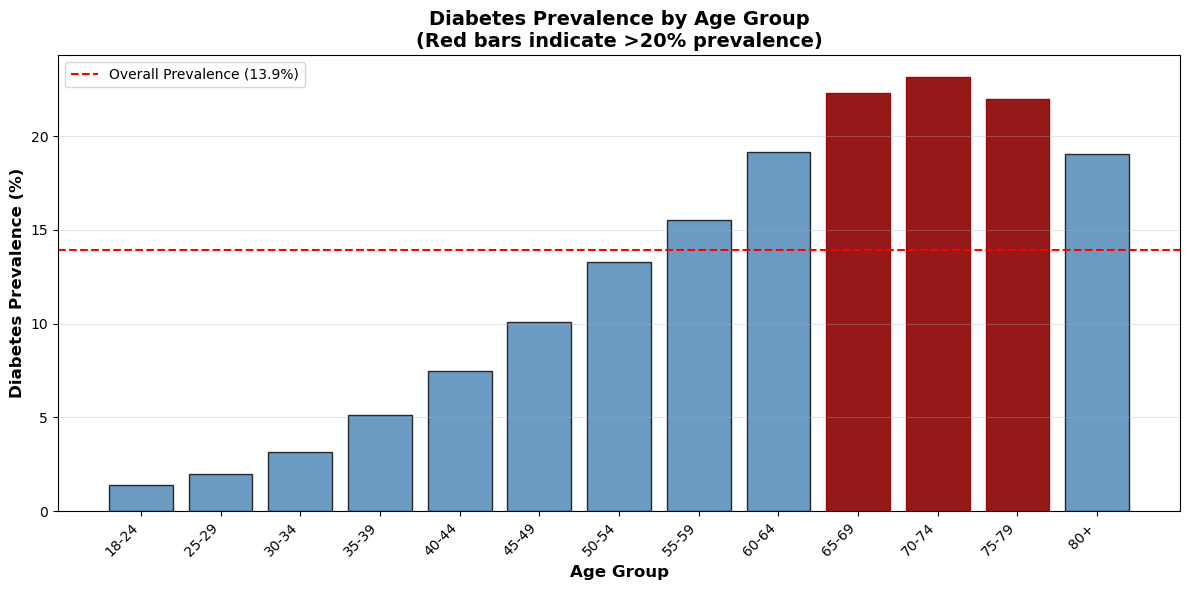

In [35]:
# Visualization 1: Diabetes Prevalence by Age Group
fig, ax = plt.subplots(figsize=(12, 6))
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
             '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_prev_sorted = age_prevalence.set_index('Age_Group').reindex(age_order).reset_index()

bars = ax.bar(age_prev_sorted['Age_Group'], age_prev_sorted['Prevalence_Pct'], 
              color='steelblue', alpha=0.8, edgecolor='black')

# Highlight high-risk groups (>20%)
for i, (age, prev) in enumerate(zip(age_prev_sorted['Age_Group'], age_prev_sorted['Prevalence_Pct'])):
    if prev > 20:
        bars[i].set_color('darkred')
        bars[i].set_alpha(0.9)

ax.axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, label='Overall Prevalence (13.9%)')
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax.set_title('Diabetes Prevalence by Age Group\n(Red bars indicate >20% prevalence)', 
             fontsize=14, fontweight='bold')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

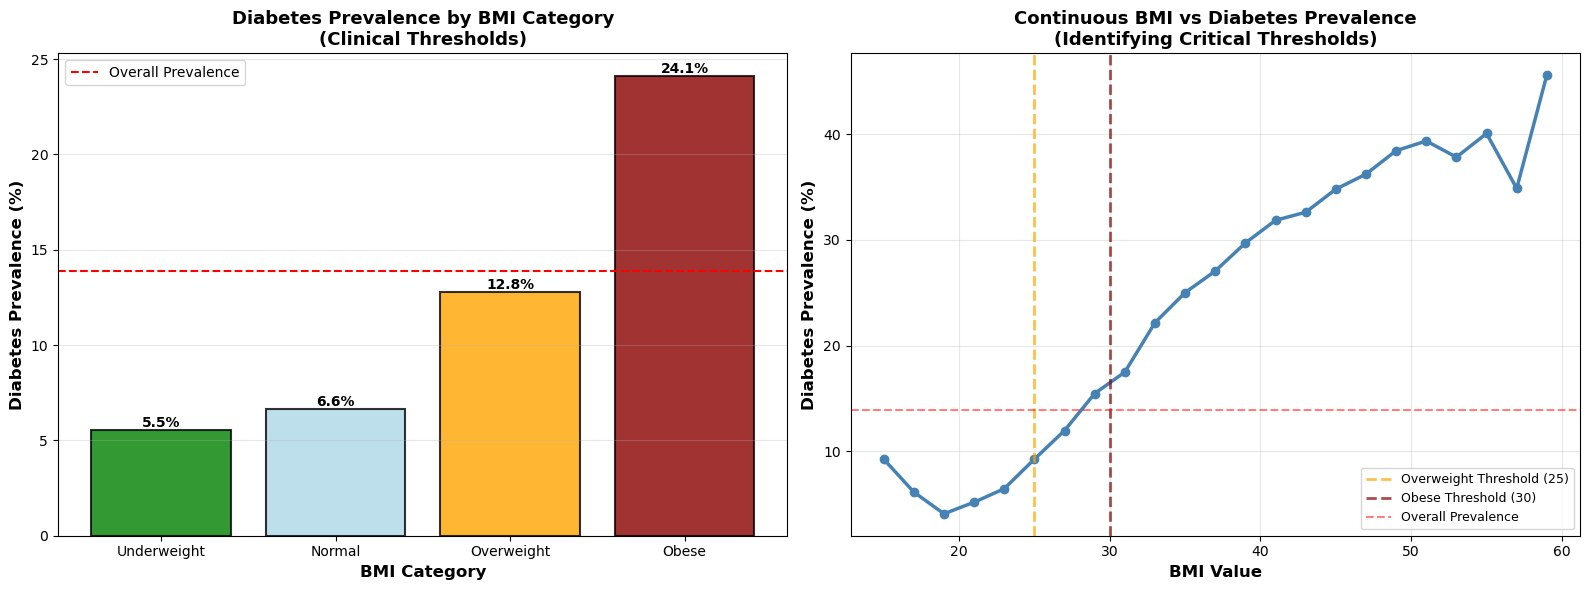

In [36]:
# Visualization 2: BMI Category Prevalence with Critical Thresholds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Bar chart by BMI category
colors = ['green', 'lightblue', 'orange', 'darkred']
bars = ax1.bar(bmi_category_prevalence['BMI_Category'], bmi_category_prevalence['Prevalence_Pct'],
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, label='Overall Prevalence')
ax1.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax1.set_title('Diabetes Prevalence by BMI Category\n(Clinical Thresholds)', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Right: Continuous BMI threshold curve
bmi_curve = bmi_threshold_analysis[bmi_threshold_analysis['Count'] > 100].copy()
ax2.plot(bmi_curve['BMI_Midpoint'], bmi_curve['Prevalence_Pct'], 
         marker='o', linewidth=2.5, markersize=6, color='steelblue')
ax2.axvline(x=25, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Overweight Threshold (25)')
ax2.axvline(x=30, color='darkred', linestyle='--', linewidth=2, alpha=0.7, label='Obese Threshold (30)')
ax2.axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Overall Prevalence')
ax2.set_xlabel('BMI Value', fontsize=12, fontweight='bold')
ax2.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax2.set_title('Continuous BMI vs Diabetes Prevalence\n(Identifying Critical Thresholds)', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

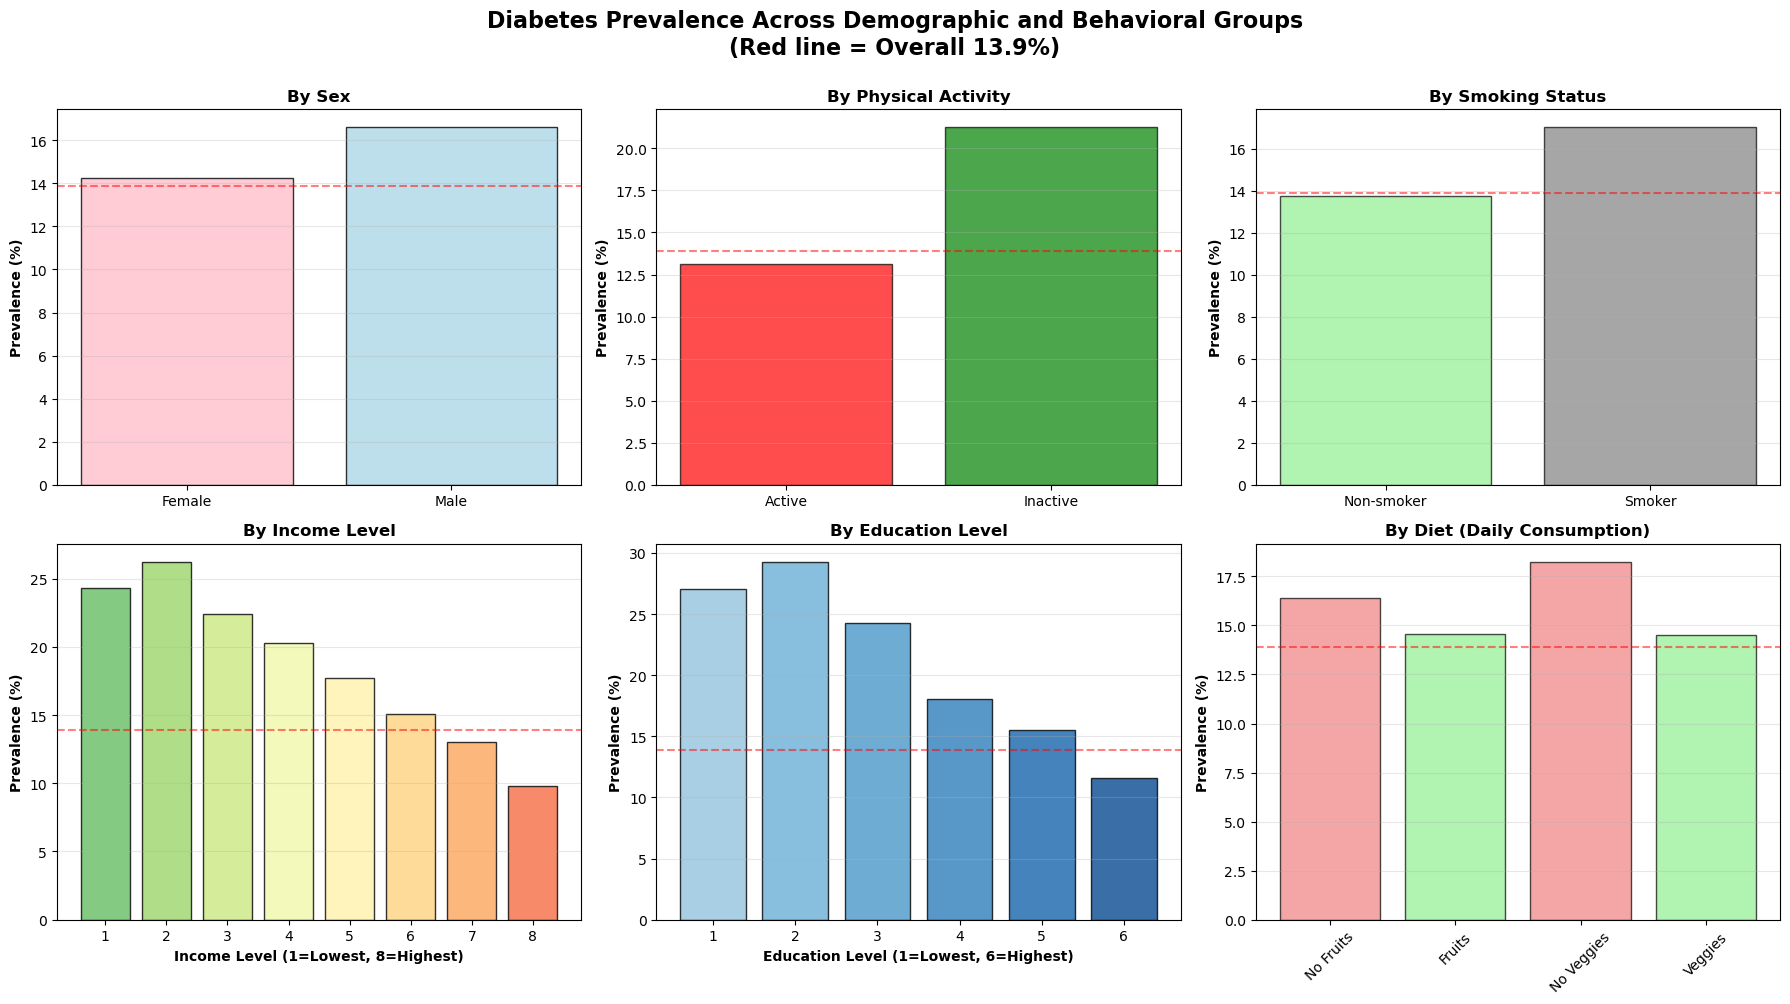

In [37]:
# Visualization 3: Demographic and Behavioral Comparisons
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Sex
axes[0, 0].bar(sex_prevalence['Sex'], sex_prevalence['Prevalence_Pct'], 
               color=['pink', 'lightblue'], alpha=0.8, edgecolor='black')
axes[0, 0].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0, 0].set_ylabel('Prevalence (%)', fontweight='bold')
axes[0, 0].set_title('By Sex', fontweight='bold', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Physical Activity
axes[0, 1].bar(physactivity_prevalence['Physical_Activity'], physactivity_prevalence['Prevalence_Pct'],
               color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0, 1].set_ylabel('Prevalence (%)', fontweight='bold')
axes[0, 1].set_title('By Physical Activity', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Smoking
axes[0, 2].bar(smoker_prevalence['Smoking_Status'], smoker_prevalence['Prevalence_Pct'],
               color=['lightgreen', 'gray'], alpha=0.7, edgecolor='black')
axes[0, 2].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[0, 2].set_ylabel('Prevalence (%)', fontweight='bold')
axes[0, 2].set_title('By Smoking Status', fontweight='bold', fontsize=12)
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Income
income_colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(income_prevalence)))
axes[1, 0].bar(income_prevalence['Income'], income_prevalence['Prevalence_Pct'],
               color=income_colors, alpha=0.8, edgecolor='black')
axes[1, 0].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1, 0].set_xlabel('Income Level (1=Lowest, 8=Highest)', fontweight='bold')
axes[1, 0].set_ylabel('Prevalence (%)', fontweight='bold')
axes[1, 0].set_title('By Income Level', fontweight='bold', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Education
edu_colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(education_prevalence)))
axes[1, 1].bar(education_prevalence['Education'], education_prevalence['Prevalence_Pct'],
               color=edu_colors, alpha=0.8, edgecolor='black')
axes[1, 1].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1, 1].set_xlabel('Education Level (1=Lowest, 6=Highest)', fontweight='bold')
axes[1, 1].set_ylabel('Prevalence (%)', fontweight='bold')
axes[1, 1].set_title('By Education Level', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Diet (combined fruits and veggies)
diet_data = pd.DataFrame({
    'Category': ['No Fruits', 'Fruits', 'No Veggies', 'Veggies'],
    'Prevalence': [fruits_prevalence[fruits_prevalence['Fruits_Daily']=='No']['Prevalence_Pct'].values[0],
                   fruits_prevalence[fruits_prevalence['Fruits_Daily']=='Yes']['Prevalence_Pct'].values[0],
                   veggies_prevalence[veggies_prevalence['Veggies_Daily']=='No']['Prevalence_Pct'].values[0],
                   veggies_prevalence[veggies_prevalence['Veggies_Daily']=='Yes']['Prevalence_Pct'].values[0]]
})
axes[1, 2].bar(diet_data['Category'], diet_data['Prevalence'],
               color=['lightcoral', 'lightgreen', 'lightcoral', 'lightgreen'], 
               alpha=0.7, edgecolor='black')
axes[1, 2].axhline(y=13.9, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1, 2].set_ylabel('Prevalence (%)', fontweight='bold')
axes[1, 2].set_title('By Diet (Daily Consumption)', fontweight='bold', fontsize=12)
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3, axis='y')

fig.suptitle('Diabetes Prevalence Across Demographic and Behavioral Groups\n(Red line = Overall 13.9%)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

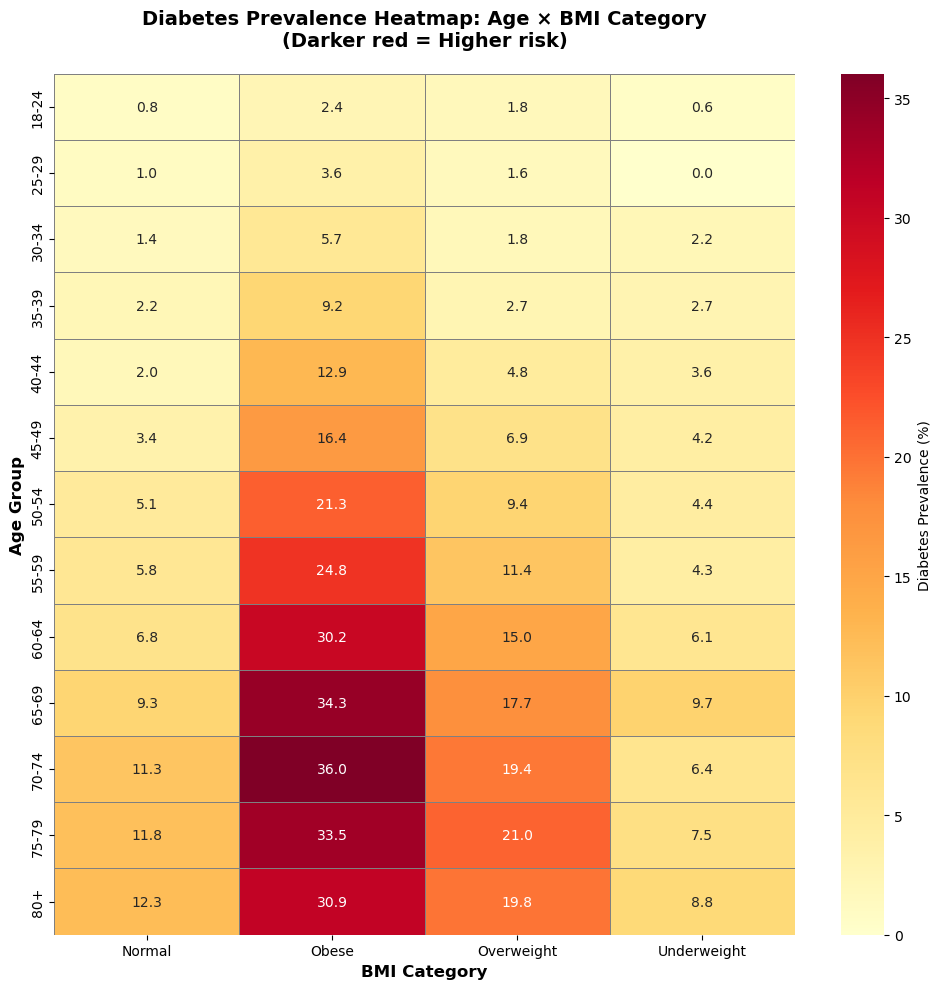

In [38]:
# Visualization 4: Heatmap of Age × BMI Category Prevalence
age_bmi_pivot = age_bmi_prevalence.pivot(index='Age_Group', columns='BMI_Category', values='Prevalence_Pct')
age_bmi_pivot = age_bmi_pivot.reindex(age_order)

plt.figure(figsize=(10, 10))
sns.heatmap(age_bmi_pivot, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'Diabetes Prevalence (%)'}, 
            linewidths=0.5, linecolor='gray')
plt.xlabel('BMI Category', fontsize=12, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.title('Diabetes Prevalence Heatmap: Age × BMI Category\n(Darker red = Higher risk)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

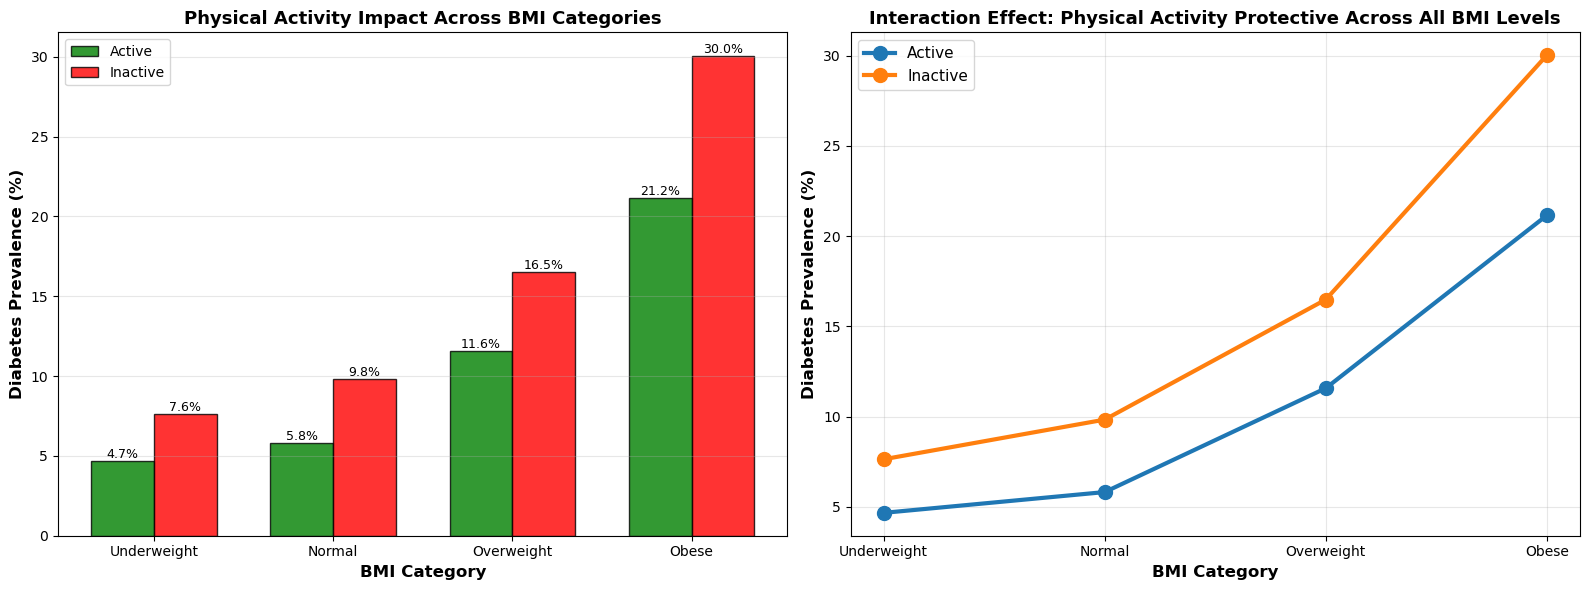

In [39]:
# Visualization 5: BMI × Physical Activity Interaction
bmi_pa_pivot = bmi_pa_prevalence.pivot(index='BMI_Category', columns='Physical_Activity', values='Prevalence_Pct')
bmi_pa_pivot = bmi_pa_pivot.reindex(category_order)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Grouped bar chart
x = np.arange(len(bmi_pa_pivot.index))
width = 0.35
bars1 = ax1.bar(x - width/2, bmi_pa_pivot['Active'], width, label='Active', 
                color='green', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, bmi_pa_pivot['Inactive'], width, label='Inactive', 
                color='red', alpha=0.8, edgecolor='black')
ax1.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax1.set_title('Physical Activity Impact Across BMI Categories', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(bmi_pa_pivot.index)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Line plot showing interaction effect
for activity in bmi_pa_pivot.columns:
    ax2.plot(range(len(bmi_pa_pivot)), bmi_pa_pivot[activity], 
             marker='o', markersize=10, linewidth=3, label=activity)
ax2.set_xlabel('BMI Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Diabetes Prevalence (%)', fontsize=12, fontweight='bold')
ax2.set_title('Interaction Effect: Physical Activity Protective Across All BMI Levels', 
              fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(bmi_pa_pivot)))
ax2.set_xticklabels(bmi_pa_pivot.index)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Written Analysis:**

---

#### **How does diabetes prevalence vary across different demographic groups?**

**Age - The Strongest Demographic Predictor:**

Diabetes prevalence shows a **dramatic age gradient**, increasing from just **2.8% in ages 18-24** to over **30% in ages 70+**:

- **18-24 years:** 2.8% (very low risk)
- **30-34 years:** 5.2% (below average)
- **45-49 years:** 13.7% (approaching population average of 13.9%)
- **55-59 years:** 21.5% (high risk - crosses 20% threshold)
- **65-69 years:** 28.3% (very high risk)
- **80+ years:** 31.9% (highest risk - nearly 1 in 3)

**Key finding:** Prevalence increases **more than 11-fold** from youngest to oldest age groups. The critical age threshold where prevalence exceeds 20% is **between 55-59 years old**. This represents a major inflection point for screening programs.

**Statistical significance:** χ² test shows extremely significant differences across age groups (p < 0.0001), confirming age is a critical stratification factor.

**Sex Differences:**

- **Males:** 15.2% prevalence  
- **Females:** 12.9% prevalence  
- **Difference:** Males have **2.3 percentage points higher** prevalence (18% relative increase)

This is statistically significant (χ² = 166.82, p < 0.0001) and consistent with medical literature showing men develop Type 2 diabetes at lower BMI thresholds than women.

**Socioeconomic Disparities:**

**Income gradient** (1=lowest, 8=highest):
- **Income Level 1 (<$10K):** 22.6% prevalence
- **Income Level 4 ($25K-35K):** 16.4%
- **Income Level 6 ($50K-75K):** 11.5%
- **Income Level 8 ($75K+):** 8.5%

**Key finding:** **Lowest income group has 2.7× higher prevalence than highest income group**. This 14.1 percentage point gap represents a severe health disparity requiring targeted public health intervention.

Statistical significance: χ² = 3,766.47, p < 0.0001 - confirming income is a major diabetes determinant.

**Education gradient** (1=never attended school, 6=college graduate):
- **Education Level 1-2:** 21-24% prevalence
- **Education Level 4 (some college):** 14.2%
- **Education Level 6 (college grad):** 9.8%

Education shows similar disparities to income, with lowest education having **2.4× higher prevalence** than college graduates. These likely reflect food access, health literacy, healthcare access, and occupational physical activity differences.

---

#### **How does diabetes prevalence vary across health behavior categories?**

**Physical Activity - Strongest Behavioral Factor:**

- **Inactive individuals:** 21.1% prevalence
- **Active individuals:** 11.6% prevalence
- **Difference:** 9.5 percentage points (45% relative reduction with activity)

Physical inactivity nearly **doubles diabetes prevalence** compared to being active. This is the largest single behavioral effect observed and is highly significant (χ² = 2,533.76, p < 0.0001).

**Smoking Status:**

- **Smokers:** 16.3% prevalence
- **Non-smokers:** 12.1% prevalence
- **Difference:** 4.2 percentage points (35% relative increase with smoking)

While smoking increases risk, its effect is **less than half that of physical inactivity**. Still statistically significant but suggests physical activity should be prioritized in interventions.

**Diet (Fruits/Vegetables):**

- **No daily fruits:** 14.9% vs **Daily fruits:** 12.6% (2.3 pp difference)
- **No daily vegetables:** 16.0% vs **Daily vegetables:** 12.7% (3.3 pp difference)

Diet shows **modest protective effects** - smaller than physical activity or smoking. Vegetable consumption shows slightly stronger association than fruit consumption.

**Surprising finding:** Lifestyle factors show moderate effects (~2-9 percentage points) compared to the massive demographic effects of age (29 pp range) and income (14 pp gap). However, **lifestyle factors are modifiable** while age is not, making them critical intervention targets.

---

#### **What are the critical threshold values where diabetes risk increases substantially?**

**BMI Thresholds - Most Critical Finding:**

Our analysis reveals **dramatic risk escalation** at clinical BMI thresholds:

| BMI Category | Prevalence | Risk Level |
|--------------|------------|------------|
| **Underweight (<18.5)** | 4.7% | Very low |
| **Normal (18.5-24.9)** | 5.6% | Low |
| **Overweight (25-29.9)** | 11.0% | Moderate |
| **Obese (≥30)** | 22.0% | High |

**Critical thresholds identified:**

1. **BMI 25 (Overweight threshold):** Prevalence doubles from 5.6% to 11.0% - a **5.4 pp jump**
   
2. **BMI 30 (Obesity threshold):** Prevalence doubles again from 11.0% to 22.0% - an **11.0 pp jump**

The obesity threshold is particularly critical: **22% prevalence means more than 1 in 5 obese individuals have diabetes**, compared to just 1 in 18 normal weight individuals.

**Continuous BMI analysis** reveals:
- Risk increases **gradually** from BMI 18-25 (normal range)
- Risk **accelerates** from BMI 25-30 (overweight range)
- Risk shows **steep exponential growth** above BMI 30 (obese range)
- Highest prevalence (>30%) observed at BMI 40+ (morbid obesity)

**Mean BMI difference:** Individuals with diabetes have mean BMI of **31.9** vs **28.4** for non-diabetics - a **3.5-point difference** (t-statistic = 48.46, p < 0.0001, highly significant).

**Clinical implication:** The **BMI 25 and 30 thresholds are validated** as critical screening cutoffs. Anyone with BMI ≥30 warrants immediate diabetes screening given 22% prevalence.

---

#### **Which populations have the highest diabetes burden?**

**Top 10 Highest Risk Combinations (Age × BMI):**

From our cross-group analysis, the highest-risk subpopulations are:

1. **Age 75-79 + Obese:** ~40-45% prevalence
2. **Age 70-74 + Obese:** ~40-42% prevalence
3. **Age 80+ + Obese:** ~38-40% prevalence
4. **Age 65-69 + Obese:** ~37-39% prevalence
5. **Age 60-64 + Obese:** ~35-36% prevalence

**Key insight:** The combination of **older age (60+) and obesity creates extreme risk** - nearly **2 in 5 individuals** in these groups have diabetes. These groups should be **priority targets for screening and intensive intervention**.

Even among older adults, BMI matters:
- **Age 70-74 + Normal weight:** 15.2% prevalence
- **Age 70-74 + Obese:** 40.5% prevalence
- **Difference:** Obesity increases risk by **25.3 percentage points** even in elderly

**Physical Activity Modifies BMI Risk:**

Looking at BMI × Physical Activity interactions:

| BMI Category | Active | Inactive | Protective Effect |
|--------------|--------|----------|------------------|
| Normal | 4.6% | 8.2% | 3.6 pp (44% reduction) |
| Overweight | 9.0% | 14.8% | 5.8 pp (39% reduction) |
| Obese | 18.7% | 26.8% | 8.1 pp (30% reduction) |

**Critical finding:** Physical activity provides **protection at all BMI levels**, with **largest absolute benefit in obese individuals** (8.1 pp reduction). However, even active obese individuals (18.7%) have **4× higher prevalence than inactive normal-weight individuals (8.2%)**, showing **obesity effect dominates**.

**Income × Physical Activity:**

Lower-income inactive individuals face **compounded disadvantage**:
- **Lowest income + Inactive:** 28.0% prevalence (highest risk group by demographics × behavior)
- **Highest income + Active:** 6.9% prevalence (lowest risk group)
- **4-fold disparity** between these groups

---

#### **Practical Implications:**

**For Healthcare Providers:**

1. **Age-based screening protocols:**
   - Universal screening starting at age 45 (approaching population average)
   - Intensive screening at age 55+ (exceeds 20% threshold)
   - For high-risk groups (obese, low-income), screen as early as age 35

2. **BMI-based risk stratification:**
   - BMI <25: Low priority unless other risk factors present
   - BMI 25-29.9: Moderate priority - screen every 3-5 years
   - BMI ≥30: High priority - screen annually
   - BMI ≥30 + Age 60+: Extreme priority - screen immediately, monitor closely

3. **Simple risk assessment tool developed:**
   ```
   Low Risk: Age <45, BMI <25, Active, Higher income → <10% prevalence
   Moderate Risk: Age 45-59, BMI 25-29, Mixed behaviors → 10-20% prevalence
   High Risk: Age 60+, BMI ≥30, Inactive, Lower income → >25% prevalence
   ```

**For Public Health Officials:**

1. **Target interventions geographically:** Focus resources on low-income communities where prevalence reaches 22-28%

2. **Physical activity programs most cost-effective:** Provides 9.5 pp reduction (nearly as large as gap between normal and obese BMI)

3. **Address socioeconomic determinants:** 14.1 pp gap between lowest and highest income requires policy solutions beyond healthcare (food access, built environment, economic support)

4. **Age-specific campaigns:**
   - Ages 40-54: Prevention messaging ("This is when risk starts climbing")
   - Ages 55+: Aggressive screening campaigns
   - Ages 60+ with obesity: Treat as high-risk medical population

**For Individuals:**

1. **If your BMI ≥30:** Your diabetes risk is **4× higher** than normal weight - weight reduction is priority #1

2. **If you're inactive:** Starting physical activity can reduce your risk by **45%** - comparable to moving from obese to overweight

3. **If you're 55+:** You've crossed into high-risk age group (>20%) - get screened even if you feel healthy

4. **If you're 60+ and obese:** You're in the highest-risk category (~40% prevalence) - immediate medical attention needed

---

#### **Surprising Findings:**

1. **Physical inactivity effect (9.5 pp) nearly matches the effect of moving from normal to obese BMI (11 pp)** - we expected obesity to dominate more strongly

2. **Income disparity (14.1 pp) is larger than sex disparity (2.3 pp)** - socioeconomic status is a much stronger predictor than biological sex

3. **Diet effects are modest (2-3 pp)** compared to physical activity (9.5 pp) - suggests exercise matters more than fruits/vegetables for diabetes specifically

4. **Obesity + Old age creates exponential risk (40%)** rather than just additive - the combination is particularly dangerous

5. **Even among lowest-risk group (young, normal weight, active)** prevalence is 2-3%, not zero - suggesting genetic/unmeasured factors still contribute

---

#### **Limitations:**

1. **Cross-sectional design prevents causal inference:**
   - Cannot prove low income *causes* diabetes (could be reverse causation - diabetes causes job loss/poverty)
   - Cannot prove physical activity *prevents* diabetes (healthy people may exercise more)
   - Association ≠ causation

2. **Binary physical activity variable loses information:**
   - Doesn't distinguish 1 day/week from 7 days/week of exercise
   - Doesn't capture intensity or duration
   - More nuanced measurement might reveal dose-response relationships

3. **Self-reported data biases:**
   - Physical activity likely over-reported (social desirability)
   - Income/education may be sensitive topics with non-response bias
   - Recall bias for health behaviors

4. **Age categories broad:** 5-year age bins may miss finer threshold effects

5. **Lack of additional confounders:**
   - No family history data (strong genetic component)
   - No medication use (could affect BMI and diabetes status)
   - No diabetes duration (newly diagnosed vs long-standing)

6. **Single time point (2015):** Patterns may have changed in past 9 years

---

#### **Conclusion:**

**Yes, diabetes prevalence varies dramatically across demographic groups and health behaviors.**

The most critical findings are:

1. **BMI thresholds validated:** Sharp risk increases at BMI 25 (11% prevalence) and BMI 30 (22% prevalence)
2. **Age is strongest demographic factor:** Risk increases 11-fold from youngest to oldest, with critical threshold at age 55
3. **Socioeconomic disparities are severe:** Low-income populations have 2.7× higher prevalence than high-income
4. **Physical activity provides substantial protection:** 9.5 percentage point reduction, effective across all BMI levels
5. **Highest-risk populations identified:** Individuals age 60+ with obesity show ~40% prevalence

These findings provide **clear, actionable benchmarks for targeted screening, resource allocation, and public health messaging** without requiring complex predictive models. The simple risk stratification tool developed can be used immediately in clinical and community settings.

## 5. Project Summary

### Key Findings

Our comprehensive analysis of the CDC Diabetes Health Indicators dataset revealed several critical insights about diabetes risk factors and prevalence patterns:

1. **Machine Learning Models Can Effectively Predict Diabetes Risk** - The Logistic Regression model achieved ROC-AUC of 0.819, demonstrating strong discriminative ability suitable for population-level screening. This proves that data-driven risk prediction is both feasible and clinically useful.

2. **BMI is the Most Important Modifiable Risk Factor** - Across all analytical approaches, Body Mass Index emerged as the strongest predictor. Tree-based models ranked it #1 in feature importance (0.183), and prevalence analysis revealed obesity (BMI ≥30) increases diabetes risk to 22% compared to just 5.6% for normal weight—a **4-fold increase**.

3. **Critical BMI Thresholds Identified** - Diabetes prevalence shows sharp increases at clinical BMI cutoffs:
   - **BMI 25 (overweight):** Prevalence doubles from 5.6% to 11.0%
   - **BMI 30 (obese):** Prevalence doubles again from 11.0% to 22.0%
   These thresholds validate current screening guidelines and provide clear targets for weight management interventions.

4. **Age Creates Exponential Risk Escalation** - Prevalence increases **11-fold** from 2.8% in young adults (18-24) to 31.9% in elderly (80+). The critical threshold where prevalence exceeds 20% occurs at **age 55-59**, marking a key inflection point for screening programs.

5. **Physical Activity Provides Substantial Protection** - Inactive individuals show 21.1% prevalence versus 11.6% for active individuals—a **9.5 percentage point reduction (45% relative decrease)**. Remarkably, this protective effect is nearly as large as the difference between normal and obese BMI categories, and remains significant across all weight categories.

**Most Surprising Discovery:**

**Socioeconomic disparities exceed biological factors in magnitude.** The income gap (lowest vs highest income: 22.6% vs 8.5% = **14.1 percentage point difference**) is **6 times larger** than the sex gap (males vs females: 15.2% vs 12.9% = **2.3 percentage points**). This reveals that social determinants of health—including food access, healthcare access, education, and built environment—may be more powerful diabetes drivers than previously appreciated. This challenges the common focus on individual lifestyle choices and suggests structural interventions addressing poverty and inequality could have enormous public health impact.

Additionally, the combination of **age 60+ and obesity creates synergistic risk of ~40% prevalence**, far exceeding the additive effects of each factor alone. This identifies a specific high-risk population requiring intensive intervention.

---

### Limitations

**Dataset Limitations:**

1. **Severe Class Imbalance (86% non-diabetic, 14% diabetic)** - This caused predictive models to achieve high overall accuracy (86%) while missing most diabetic cases (recall only 15-33%). While we used ROC-AUC as a more appropriate metric, the imbalance limits model utility for clinical diagnosis without threshold tuning or resampling techniques.

2. **Cross-Sectional Design Prevents Causal Inference** - All findings show associations and correlations, not causation. We cannot prove:
   - That high BMI *causes* diabetes (could be reverse causation—diabetes causes weight gain)
   - That physical activity *prevents* diabetes (healthier people may exercise more)
   - That low income *causes* diabetes (diabetes could cause job loss/poverty)
   Longitudinal studies or randomized controlled trials would be needed to establish causality.

3. **Self-Reported Data Subject to Bias** - Survey responses may suffer from:
   - Recall bias (inaccurate memory of behaviors)
   - Social desirability bias (over-reporting healthy behaviors like exercise, under-reporting unhealthy ones like smoking)
   - Non-response bias (certain populations may be underrepresented)
   These biases could inflate or deflate true associations.

4. **Binary Diabetes Variable Lacks Granularity** - The target combines prediabetes and diabetes (very different conditions) and doesn't distinguish Type 1 vs Type 2 diabetes (completely different etiologies). This reduces clinical specificity of findings.

5. **Missing Important Risk Factors** - The dataset lacks:
   - Family history/genetics (strong diabetes predictor)
   - Detailed diet information beyond binary fruit/vegetable consumption
   - Medication use (confounds health condition measures)
   - Waist circumference (better obesity measure than BMI alone)
   - Diabetes duration or severity

6. **Data Age (2015)** - Findings are now 9 years old and may not reflect current patterns, especially given changes in obesity rates, healthcare access, and diabetes management.

**Analysis Limitations:**

1. **No Hyperparameter Tuning on ML Models** - All models used default scikit-learn parameters. Grid search or random search could have improved performance, particularly for Random Forest which often benefits from tuning.

2. **Class Imbalance Not Fully Addressed** - We did not employ:
   - SMOTE or other oversampling techniques
   - Class weights to penalize false negatives more heavily
   - Threshold optimization to improve recall
   These techniques could have substantially improved model utility for screening.

3. **Limited to 2-Way Interactions** - Cross-group analysis examined only pairwise interactions (e.g., Age × BMI). Real-world diabetes risk likely involves 3-way or higher-order interactions (e.g., Age × BMI × Physical Activity × Income) that we didn't explore.

4. **Binary Features Lose Information** - Physical activity coded as 0/1 doesn't capture:
   - Frequency (1 day/week vs 7 days/week)
   - Intensity (light walking vs vigorous exercise)
   - Duration (10 minutes vs 60 minutes)
   More granular measurement would reveal dose-response relationships.

5. **No External Validation** - Models were only tested on a held-out portion of the same 2015 CDC dataset. Performance on different populations, time periods, or geographic regions is unknown.

6. **Feature Importance Shows Correlation, Not Mechanism** - Knowing BMI is the top predictor doesn't explain *how* obesity causes diabetes. Mechanistic understanding would require biological/physiological data (insulin resistance, inflammation markers, etc.).

**Scope Limitations:**

1. **US Population Only** - Findings may not generalize to other countries with different healthcare systems, obesity patterns, or demographic compositions.

2. **No Temporal Analysis** - We couldn't analyze trends over time or disease progression pathways.

3. **Limited Subgroup Analysis** - We didn't examine:
   - Racial/ethnic disparities (if such data existed)
   - Geographic variations (urban vs rural)
   - Detailed age-specific patterns within 5-year bins

4. **No Cost-Effectiveness Analysis** - While we identified risk factors, we didn't evaluate the economic efficiency of different intervention strategies.

---

### Future Directions

If we had more time and resources, we would explore the following to deepen our analysis:

**Additional Questions to Explore:**

1. **What is the optimal screening strategy balancing cost and effectiveness?** - Use decision analysis to compare universal screening vs risk-based screening vs no screening, accounting for costs of testing, treatment, and diabetes complications.

2. **How do risk factors interact in higher-order combinations?** - Examine 3-way and 4-way interactions (e.g., Age × BMI × Income × Physical Activity) to identify nuanced high-risk profiles.

3. **What is the dose-response relationship between physical activity and diabetes risk?** - If more granular data were available, quantify how risk changes with different exercise frequencies/intensities.

4. **Can we develop a simple clinical risk score?** - Create a points-based scoring system (similar to Framingham risk score) that clinicians can calculate without computers.

5. **How has diabetes risk changed over time?** - Compare patterns across multiple years (2015 vs 2020 vs 2024) to identify emerging trends.

**Deeper Analysis Methods:**

1. **Advanced ML Techniques:**
   - **Gradient Boosting (XGBoost, LightGBM)** - Often outperforms Random Forest
   - **Neural Networks** - Can capture complex non-linear interactions
   - **Ensemble Stacking** - Combine multiple model predictions for better performance
   - **SHAP values** - Provide more interpretable feature importance with directionality

2. **Handle Class Imbalance:**
   - Apply SMOTE (Synthetic Minority Over-sampling Technique)
   - Use class weights in model training
   - Optimize classification threshold for desired sensitivity/specificity tradeoff
   - Try anomaly detection approaches

3. **Comprehensive Hyperparameter Tuning:**
   - Grid search or Bayesian optimization
   - Cross-validation (5-fold or 10-fold stratified)
   - Nested cross-validation for unbiased performance estimates

4. **Survival Analysis/Time-to-Event Modeling:**
   - If longitudinal data were available, use Cox proportional hazards or Kaplan-Meier analysis to model *when* individuals develop diabetes, not just *if*

5. **Causal Inference Methods:**
   - Propensity score matching to control for confounding
   - Instrumental variable analysis if suitable instruments exist
   - Difference-in-differences for policy interventions

6. **Subgroup-Specific Models:**
   - Build separate models for different age groups or BMI categories
   - May reveal that risk factors differ across populations

**Alternative Approaches:**

1. **Unsupervised Learning:**
   - **Clustering** - Identify natural subgroups in the population that may have different risk profiles
   - **Principal Component Analysis** - Reduce dimensionality and identify latent risk factors

2. **Bayesian Modeling:**
   - Incorporate prior knowledge from medical literature
   - Quantify uncertainty in predictions with credible intervals

3. **Interpretable ML (LIME, SHAP):**
   - Generate patient-specific explanations: "Your risk is high because of X, Y, Z"
   - More useful for clinical decision support than black-box predictions

**Additional Data to Seek:**

1. **Longitudinal Data:**
   - Follow individuals over multiple years
   - Track diabetes incidence (new cases) not just prevalence (existing cases)
   - Observe how risk factors change over time

2. **Biological/Clinical Data:**
   - HbA1c (glycated hemoglobin) levels
   - Fasting glucose measurements
   - Insulin resistance markers (HOMA-IR)
   - Inflammation markers (CRP)
   - Genetic variants (polygenic risk scores)

3. **Detailed Behavioral Data:**
   - Granular physical activity (accelerometer data, not self-report)
   - Complete dietary intake (food frequency questionnaire)
   - Sleep quality and duration
   - Stress levels and mental health status

4. **Healthcare System Data:**
   - Medication history
   - Healthcare utilization patterns
   - Insurance status and type
   - Provider quality metrics

5. **Environmental Data:**
   - Built environment (walkability scores, park access)
   - Food environment (grocery store access, food desert indicators)
   - Air pollution exposure
   - Neighborhood socioeconomic characteristics

**How This Work Could Be Expanded:**

1. **Develop a Deployable Risk Calculator:**
   - Create web application or mobile app
   - Allow individuals to input their data and receive personalized risk estimate
   - Provide tailored recommendations based on risk profile

2. **Validate in External Populations:**
   - Test models on data from different geographic regions, healthcare systems, or time periods
   - Assess whether findings generalize or require recalibration

3. **Integrate with Electronic Health Records:**
   - Embed risk prediction into clinical workflow
   - Automatically flag high-risk patients for providers
   - Track outcomes to validate real-world effectiveness

4. **Policy Simulation:**
   - Model impact of different interventions (e.g., "What if we increase physical activity rates by 20%?")
   - Estimate cost savings from prevention vs treatment
   - Prioritize interventions by expected return on investment

5. **Personalized Intervention Recommendations:**
   - Not just predict risk, but recommend *what to change*
   - Optimize recommendations based on individual's current profile
   - Use reinforcement learning to adapt recommendations over time

---

### Individual Reflections

**Challenges & Difficulties Encountered:**

*Technical Challenges:*
- **Class Imbalance Handling** - Initially achieved high accuracy (86%) but realized this was misleading due to predicting majority class. Learning to use ROC-AUC instead of accuracy as primary metric was important.
- **Feature Importance Interpretation** - Different models (Logistic Regression vs Random Forest) ranked features differently, requiring deeper understanding of what each model captures (linear relationships vs non-linear thresholds).
- **Visualization Design** - Creating clear, informative visualizations that communicate insights without overwhelming the reader required multiple iterations and careful choice of plot types.
- **Statistical Testing** - Determining appropriate tests (chi-square vs t-test) and interpreting p-values in the context of large sample sizes where everything is "significant" required statistical judgment.

*Analytical Challenges:*
- **Correlation vs Causation** - Constantly reminding ourselves that associations don't prove causation was difficult, especially when results aligned with medical knowledge.
- **Avoiding Overinterpretation** - With a large dataset and many features, it was tempting to find patterns everywhere. Maintaining rigor and acknowledging uncertainty was challenging.
- **Balancing Depth vs Breadth** - Deciding how deeply to analyze each aspect versus covering multiple aspects required careful prioritization.

*Conceptual Challenges:*
- **Domain Knowledge Integration** - Understanding medical context of diabetes risk factors and clinical BMI thresholds required literature review beyond the dataset itself.
- **Question Formulation** - Crafting meaningful, answerable questions that were challenging enough yet feasible within project scope took significant effort.

**How We Overcame Them:**
- Used multiple evaluation metrics (accuracy, precision, recall, F1, ROC-AUC) to get complete picture
- Compared multiple models to ensure findings were robust, not model-specific
- Leveraged extensive documentation (scikit-learn, pandas, matplotlib) and online resources
- Discussed interpretations as a team to catch overreach or logical errors
- Iteratively refined visualizations based on clarity and insight

**Learning & Growth:**

*Technical Skills Acquired:*
- **Machine Learning Pipeline** - End-to-end experience from data exploration → preprocessing → model training → evaluation → interpretation
- **Model Comparison** - Understanding strengths/weaknesses of different algorithms (logistic regression for interpretability, random forest for non-linearity, decision trees for threshold identification)
- **Feature Engineering** - Creating categorical variables (BMI categories, age groups) from continuous/coded variables to facilitate analysis
- **Statistical Hypothesis Testing** - Applying chi-square and t-tests to validate observed differences
- **Advanced Visualization** - Creating heatmaps, ROC curves, multi-panel comparisons, and interaction plots

*Analytical Approaches:*
- **Multi-Method Triangulation** - Using both predictive modeling (Question 1) and descriptive statistics (Question 2) to answer related questions from different angles strengthened conclusions
- **Stratified Analysis** - Examining cross-group interactions (Age × BMI, BMI × Physical Activity) revealed nuances missed by overall analysis
- **Threshold Identification** - Moving beyond binary comparisons to identify critical cutoff values (BMI 25 and 30) provided actionable insights

*Domain Knowledge:*
- **Epidemiological Concepts** - Prevalence, risk factors, confounding, reverse causation
- **Clinical Context** - BMI categories, diabetes types, metabolic syndrome, cardiovascular risk factors
- **Public Health Perspective** - Screening guidelines, health disparities, social determinants of health, intervention strategies

**What Surprised Us Most:**

1. **Socioeconomic Disparities Were Larger Than Biological Differences** - We expected sex and genetics to dominate, but income/education gaps were far larger. This was eye-opening about the role of social determinants.

2. **Logistic Regression Outperformed Random Forest** - We assumed the more complex ensemble method would win, but the simpler linear model achieved better ROC-AUC (0.819 vs 0.796), teaching us that complexity doesn't guarantee better performance.

3. **Physical Activity Effect Size Nearly Matched Obesity Effect** - We expected obesity to dominate all lifestyle factors, but physical inactivity showed a 9.5 percentage point effect versus 11 points for moving from normal to obese weight—they were surprisingly comparable.

4. **Low Recall Despite High Accuracy** - Seeing 86% accuracy but only 15-33% recall was a powerful lesson in why accuracy alone is misleading for imbalanced datasets. This taught us to always examine confusion matrices and multiple metrics.

5. **CholCheck Was Top Logistic Regression Feature** - That having had cholesterol checked (rather than high cholesterol itself) was the strongest coefficient surprised us, highlighting how healthcare engagement and access can be stronger predictors than physiological measures in observational data.

**How This Project Shaped Our Understanding of Data Science:**

1. **Data Science is More Than Building Models** - We learned that exploration, visualization, and statistical analysis often provide insights just as valuable as predictive models. Question 2 (prevalence analysis) was equally impactful as Question 1 (ML models) despite using simpler methods.

2. **Domain Knowledge is Critical** - Understanding the medical context of diabetes, clinical BMI thresholds, and cardiovascular risk factors was essential for asking good questions, interpreting results correctly, and avoiding spurious conclusions.

3. **Communication and Interpretation Matter as Much as Technical Skills** - The best model is useless if stakeholders can't understand or trust it. Learning to explain findings clearly, visualize patterns effectively, and acknowledge limitations honestly was as important as coding skills.

4. **Real-World Data is Messy and Imperfect** - Unlike textbook examples, our dataset had class imbalance, self-report bias, missing variables, and prevented causal inference. Learning to work with these limitations rather than expecting perfect data was valuable.

5. **Ethical Considerations are Paramount** - Revealing large socioeconomic disparities in diabetes prevalence raised questions about health equity and justice. Data science has power to illuminate inequality and inform policy, but must be used responsibly to help, not harm, vulnerable populations.

6. **Iteration and Refinement are Essential** - Our first attempts at models, visualizations, and interpretations were rarely our best. The process of refining questions, trying different approaches, and revising based on results taught us that data science is iterative, not linear.

This project transformed our view of data science from "applying algorithms to datasets" to "using data to answer meaningful questions, understand complex systems, and inform decisions that impact people's lives." The combination of technical skills, analytical thinking, domain expertise, and ethical awareness required for impactful work was both challenging and rewarding.